# TP de Synthèse : Intelligence Artificielle avec Python

L'objectif de ce TP est de faire une synthèse de toutes les notions que vous avez vu sur l'ensemble du cours IA & Python.

À partir d'un jeu de donnée imposé, vous allez devoir proposer une analyse détaillée, et produire des modèles prédictifs avec les meilleures performances possibles.

## À votre disposition :
- Un fichier `Hotel Reservations.csv` contenant les données à analyser, avec pour chaque donnée la valeur de la classe à prédire
- Un fichier `Donnees_Test.csv` de test, comprenant des données sans la valeur de la classe
- Ce notebook, contenant toutes vos instructions, ainsi qu'une description du _Dataset_

## Méthode de travail :
Ce travail peut-être effectué seul, ou en groupe de 2 personnes.

## Rendus attendus :
- Un notebook comprenant votre analyse détaillé du _Dataset_, et la construction de vos modèles prédictifs
- Un fichier CSV, avec sur chaque ligne votre prédiction de classe pour la ligne correspondante dans le fichier de test (`Donnees_Test.csv`).<br/>Ce fichier doit être nommé `NOM_Prénom_.csv` ou `NOM1_NOM2.csv` (si binôme), et ne contient qu'une info par ligne : soit `Canceled`, soit `Not_canceled`.

## Évaluation :
- Lorsque tous les groupes auront rendu leur fichier csv, le formatteur fera tourner un script, pour identifier le groupe ayant produit le modèle avec le meilleur résultat sur le jeu de test.
- Vous devrez fournir vos notebook à un autre groupe de la classe, et relire le notebook d'un autre groupe, pour lui faire un retour sur la qualité de l'analyse de ses données.

## Description des données

Les données à votre disposition décrivent les informations des clients de réservations de chambres d'hôtels.

L'objectif est de détermine, pour chaque client, s'il risque d'annuler sa réservation.

Vous avez à votre disposition les attributs suivants :

- `Booking_ID`: identifiant unique de chaque réservation
- `no_of_adults`: nombre d'adultes dans la réservation
- `no_of_children`: nombre d'enfants dans la réservation
- `no_of_weekend_nights`: nombre de nuits en weekend (samedi ou dimanche) incluses dans la réservation
- `no_of_week_nights`: nombre de nuits de semaine (lundi au vendredi) incluses dans la réservation
- `type_of_meal_plan`: choix de formule repas
- `required_car_parking_space` : indique une réservation de place de parking (0 : non, 1 : oui)
- `room_type_reserved`: type de chambre réservé
- `lead_time` : nombre de jours entre la date de réservation et la date d'arrivée
- `arrival_year` : année de la date d'arrivée
- `arrival_month`: mois de la date d'arrivée
- `arrival_date`: jour de la date d'arrivée
- `market_segment_type`: désignation du segment marketing
- `repeated_guest` : indique s'il s'agit d'un client fréquent (0 : non, 1 : oui)
- `no_of_previous_cancellations` : nombre d'annulation déjà faite par ce client sur d'autres réservations
- `no_of_previous_bookings_not_canceled`: nombre de réservations déjà faites sans annulations
- `avg_price_per_room`: prix moyen journalier de la réservation (en euros)
- `no_of_special_requests`: nombre total des requêtes spécifiques du client (étage, vue, ...)
- `booking_status` : indique si la réservation a été annulée ou non (=classe à prédire !)

## Les questions auxquelles vous devez répondre

Nous vous proposons ci-après une liste de questions à vous poser.
Il ne s'agit pas d'une obligation, ni d'une liste exhaustive, mais elles doivent vous permettre de vérifier un certains nombre de points de votre analyse.

_N.B. : N'oubliez pas de vous appuyer dès que possible sur des représentations graphiques parlantes, et sur des statistiques précises._

1. Combien d'attributs ?
1. Combien de données ?
1. Combien de classes ?
1. Quelle répartition entre les classes ?
1. Valeurs manquantes ?
1. Quelle répartition des valeurs sur chaque attribut ?
1. Quelle caractérisation de chaque attribut ?
1. Corrélation entre certains attributs ?
1. Nettoyage des données nécessaire ?
1. Transformation des données ?
1. Normalisation ?
1. Quelle(s) forme(s) d'apprentissage ?
1. Quels algorithmes privilégier ?
1. Quelles performances privilégier ?
1. Comment améliorer les performances initiales ?
1. Comment choisir les paramètres des algorithmes ?

## Considérations supplémentaires

Il vous est également demandé de réfléchir aux questions suivantes :
1. Quelle valeur ajoutée pourrait apporter vos analyses et votre algorithme aux hôtels ?
1. À quels aspects législatisf devriez-vous prendre garde ?
1. Votre algorithme pourrait-il être utilisé à mauvais escient ?

## Étude des prix_moyen égaux à 0 pour déterminer si on les garde ou pas.

1. Sélection sur un jeu de donnée propre.
1. Nettoyage pour avoir une colonne booléenne
1. Étude de la distribution dans ce jeu de donnée selon 'canceled' ou non.

In [66]:
hdStats = pd.read_csv('Hotel Reservations.csv')

from sklearn.preprocessing import OneHotEncoder
cols_to_encode = ['booking_status']

encoder = OneHotEncoder(drop='if_binary', sparse_output=False).set_output(transform='pandas')

for col in cols_to_encode:
    encoded = encoder.fit_transform(hdStats[[col]])
    hdStats= pd.concat([hdStats, encoded], axis=1)
    hdStats = hdStats.drop([col], axis='columns')

hdStats.rename(columns={'booking_status_Not_Canceled':'not_canceled'}, inplace=True)

NameError: name 'pd' is not defined

In [ ]:
hdStats[(hdStats['avg_price_per_room']==0)&(hdStats['not_canceled']==1)].describe()
#hdStats[(hdStats['avg_price_per_room']==0)].describe()
#sns.pairplot(data=hd[(hd['avg_price_per_room']==0)], hue='booking_status')

In [ ]:
hdStats[(hdStats['avg_price_per_room']==0)].info()

sns.histplot(data=hdStats[(hdStats['avg_price_per_room']==0)], x='market_segment_type', hue='not_canceled')

In [ ]:
#sns.histplot(data=hdStats, x='room_type_reserved', hue='canceled', multiple='stack')
#hdStats['room_type_reserved'].unique()
#sns.scatterplot(data=hdStats, x='room_type_reserved', y='avg_price_per_room', hue='canceled')
#mlp.xticks(range(0,7), [i for i in range(1,8)])

#sns.histplot(data=hdStats, x='avg_price_per_room', hue='room_type_reserved', multiple='stack')

hdStats.groupby('room_type_reserved').describe()

hdStats.groupby(['not_canceled','room_type_reserved']).size().unstack()

In [ ]:
hdStats.info()

# Étude des données #

## Import & Initalisation ##

In [121]:
#Imports :

import pandas as pd
import matplotlib.pyplot as mlp
import numpy as np
import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder

In [123]:
hd = pd.read_csv('Hotel Reservations.csv')
hdTest = pd.read_csv('Donnees_test.csv')

hd

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
29994   INN29995             2               0                     0   
29995   INN29996             2               0                     0   
29996   INN29997             2               0                     0   
29997   INN29998             1               0                     0   
29998   INN29999             1               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
29994                  2       Meal Plan 1                           0   
29995                  3       Meal Plan 1                           0   
29996                  2       Meal Plan 1                           0   
29997                  2       Meal Plan 1                           0   
29998                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
2            Room_Type 1          1          2018              2   
3            Room_Type 1        211          2018              5   
4            Room_Type 1         48          2018              4   
...                  ...        ...           ...            ...   
29994        Room_Type 1        322          2018             12   
29995        Room_Type 1         91          2018              5   
29996        Room_Type 1         24          2018              4   
29997        Room_Type 1        266          2018             12   
29998        Room_Type 1          3          2018              7   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
2                28              Online               0   
3                20              Online               0   
4                11              Online               0   
...             ...                 ...             ...   
29994             9             Offline               0   
29995            11             Offline               0   
29996            21              Online               0   
29997             2             Offline               0   
29998            11           Corporate               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
29994                             0                                     0   
29995                             0                                     0   
29996                            

In [125]:
#Transformation de la colonne Annulé ou non
hd['canceled']= hd['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})
hd = hd.drop(['booking_status'], axis='columns')

## Étude générale ##

In [128]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29999 non-null  object 
 1   no_of_adults                          29999 non-null  int64  
 2   no_of_children                        29999 non-null  int64  
 3   no_of_weekend_nights                  29999 non-null  int64  
 4   no_of_week_nights                     29999 non-null  int64  
 5   type_of_meal_plan                     29999 non-null  object 
 6   required_car_parking_space            29999 non-null  int64  
 7   room_type_reserved                    29999 non-null  object 
 8   lead_time                             29999 non-null  int64  
 9   arrival_year                          29999 non-null  int64  
 10  arrival_month                         29999 non-null  int64  
 11  arrival_date   

In [130]:
hd.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  29999.000000    29999.000000          29999.000000       29999.000000   
mean       1.845862        0.105037              0.806127           2.202140   
std        0.518453        0.403747              0.868561           1.402214   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                29999.000000  29999.000000  29999.000000   29999.000000   
mean                     0.031301     85.503217   2017.821894       7.428548   
std                      0.174133     86.072456      0.382608       3.064046   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    127.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  29999.000000    29999.000000                  29999.000000   
mean      15.583819        0.025668                      0.022701   
std        8.723316        0.158144                      0.353166   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          29999.000000        29999.000000   
mean                               0.155139          103.412309   
std                                1.771725           35.043692   
min                                0.000000            0.000000   
25%                                0.000000           80.500000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          375.500000   

       no_of_special_requests      canceled  
count            29999.000000  29999.000000  
mean                 0.620687      0.327178  
std                  0.787359      0.469191  
min                  0.000000      0.000000  
25%                  0.000000      0.000000  
50%                  0.000000      0.000000  
75%                  1.000000      1.000000  
max                  5.000000      1.000000

In [132]:
hd.describe(include=['O'])

Booking_ID type_of_meal_plan room_type_reserved market_segment_type
count       29999             29999              29999               29999
unique      29999                 4                  7                   5
top      INN00001       Meal Plan 1        Room_Type 1              Online
freq            1             22988              23267               19319

#### Proportion d'annulation ####

On pouvait déjà le remarquer sur le describe précédent, la proportion d'annulation est de 32.71%.

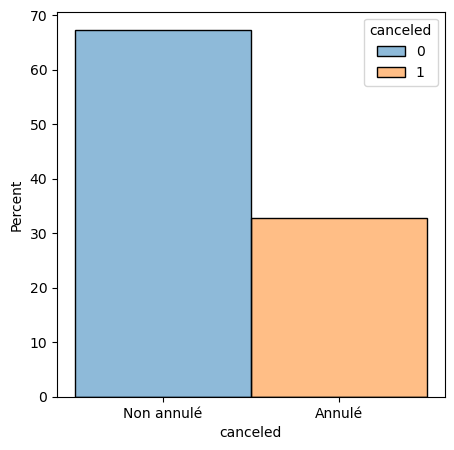

In [136]:
fig = mlp.gcf()
sns.histplot(data=hd, x='canceled', hue='canceled', stat='percent', discrete=True)
fig.set_size_inches(5,5)
mlp.xticks([0,1],['Non annulé', 'Annulé'])
print()

#### HeatMap ####

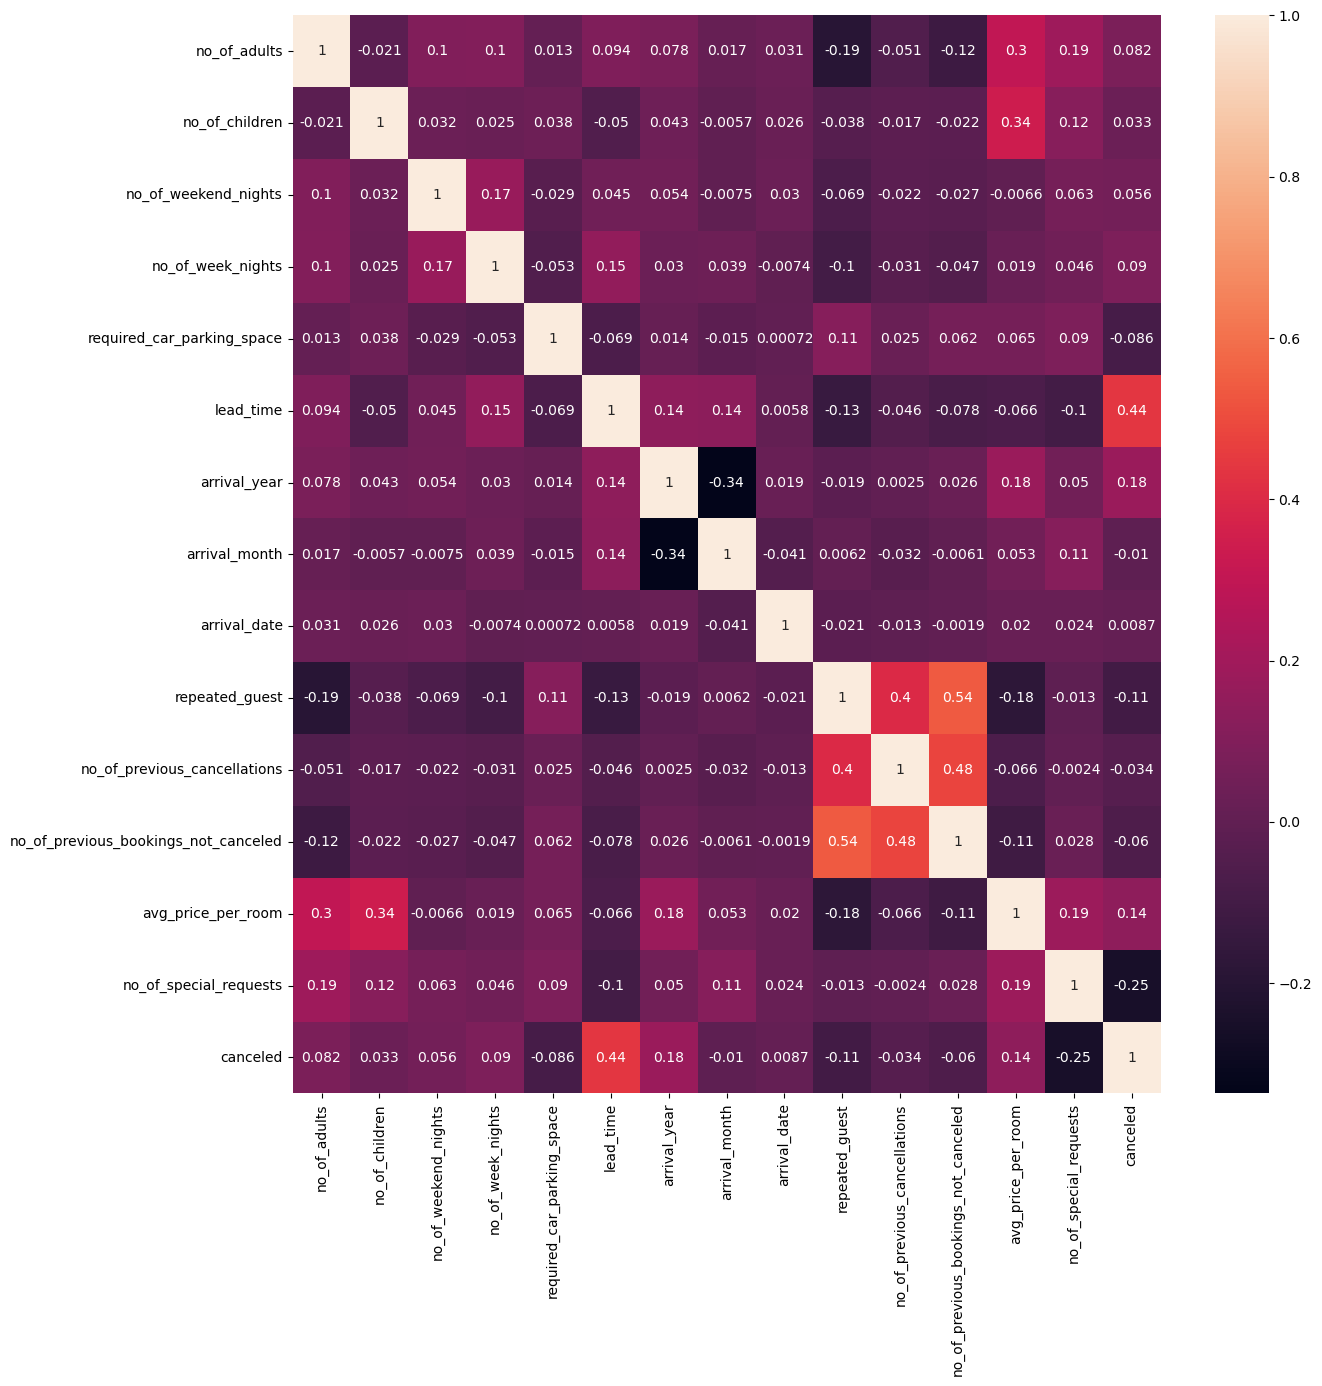

In [139]:
fig = mlp.gcf()

numHd = hd.drop(['Booking_ID','type_of_meal_plan','room_type_reserved','market_segment_type'], axis=1)
sns.heatmap(numHd.corr(), annot=True)

fig.set_size_inches(14,14)


##### Remarques : #####
* Interval entre réservation et arrivée très corrélé avec une annulation.
* Année d'arrivée également, à creuser pour voir la répartition des données.
* Nombre de réquêtes corrélées également.
* Prix moyen aussi.

#### Pairplot ####

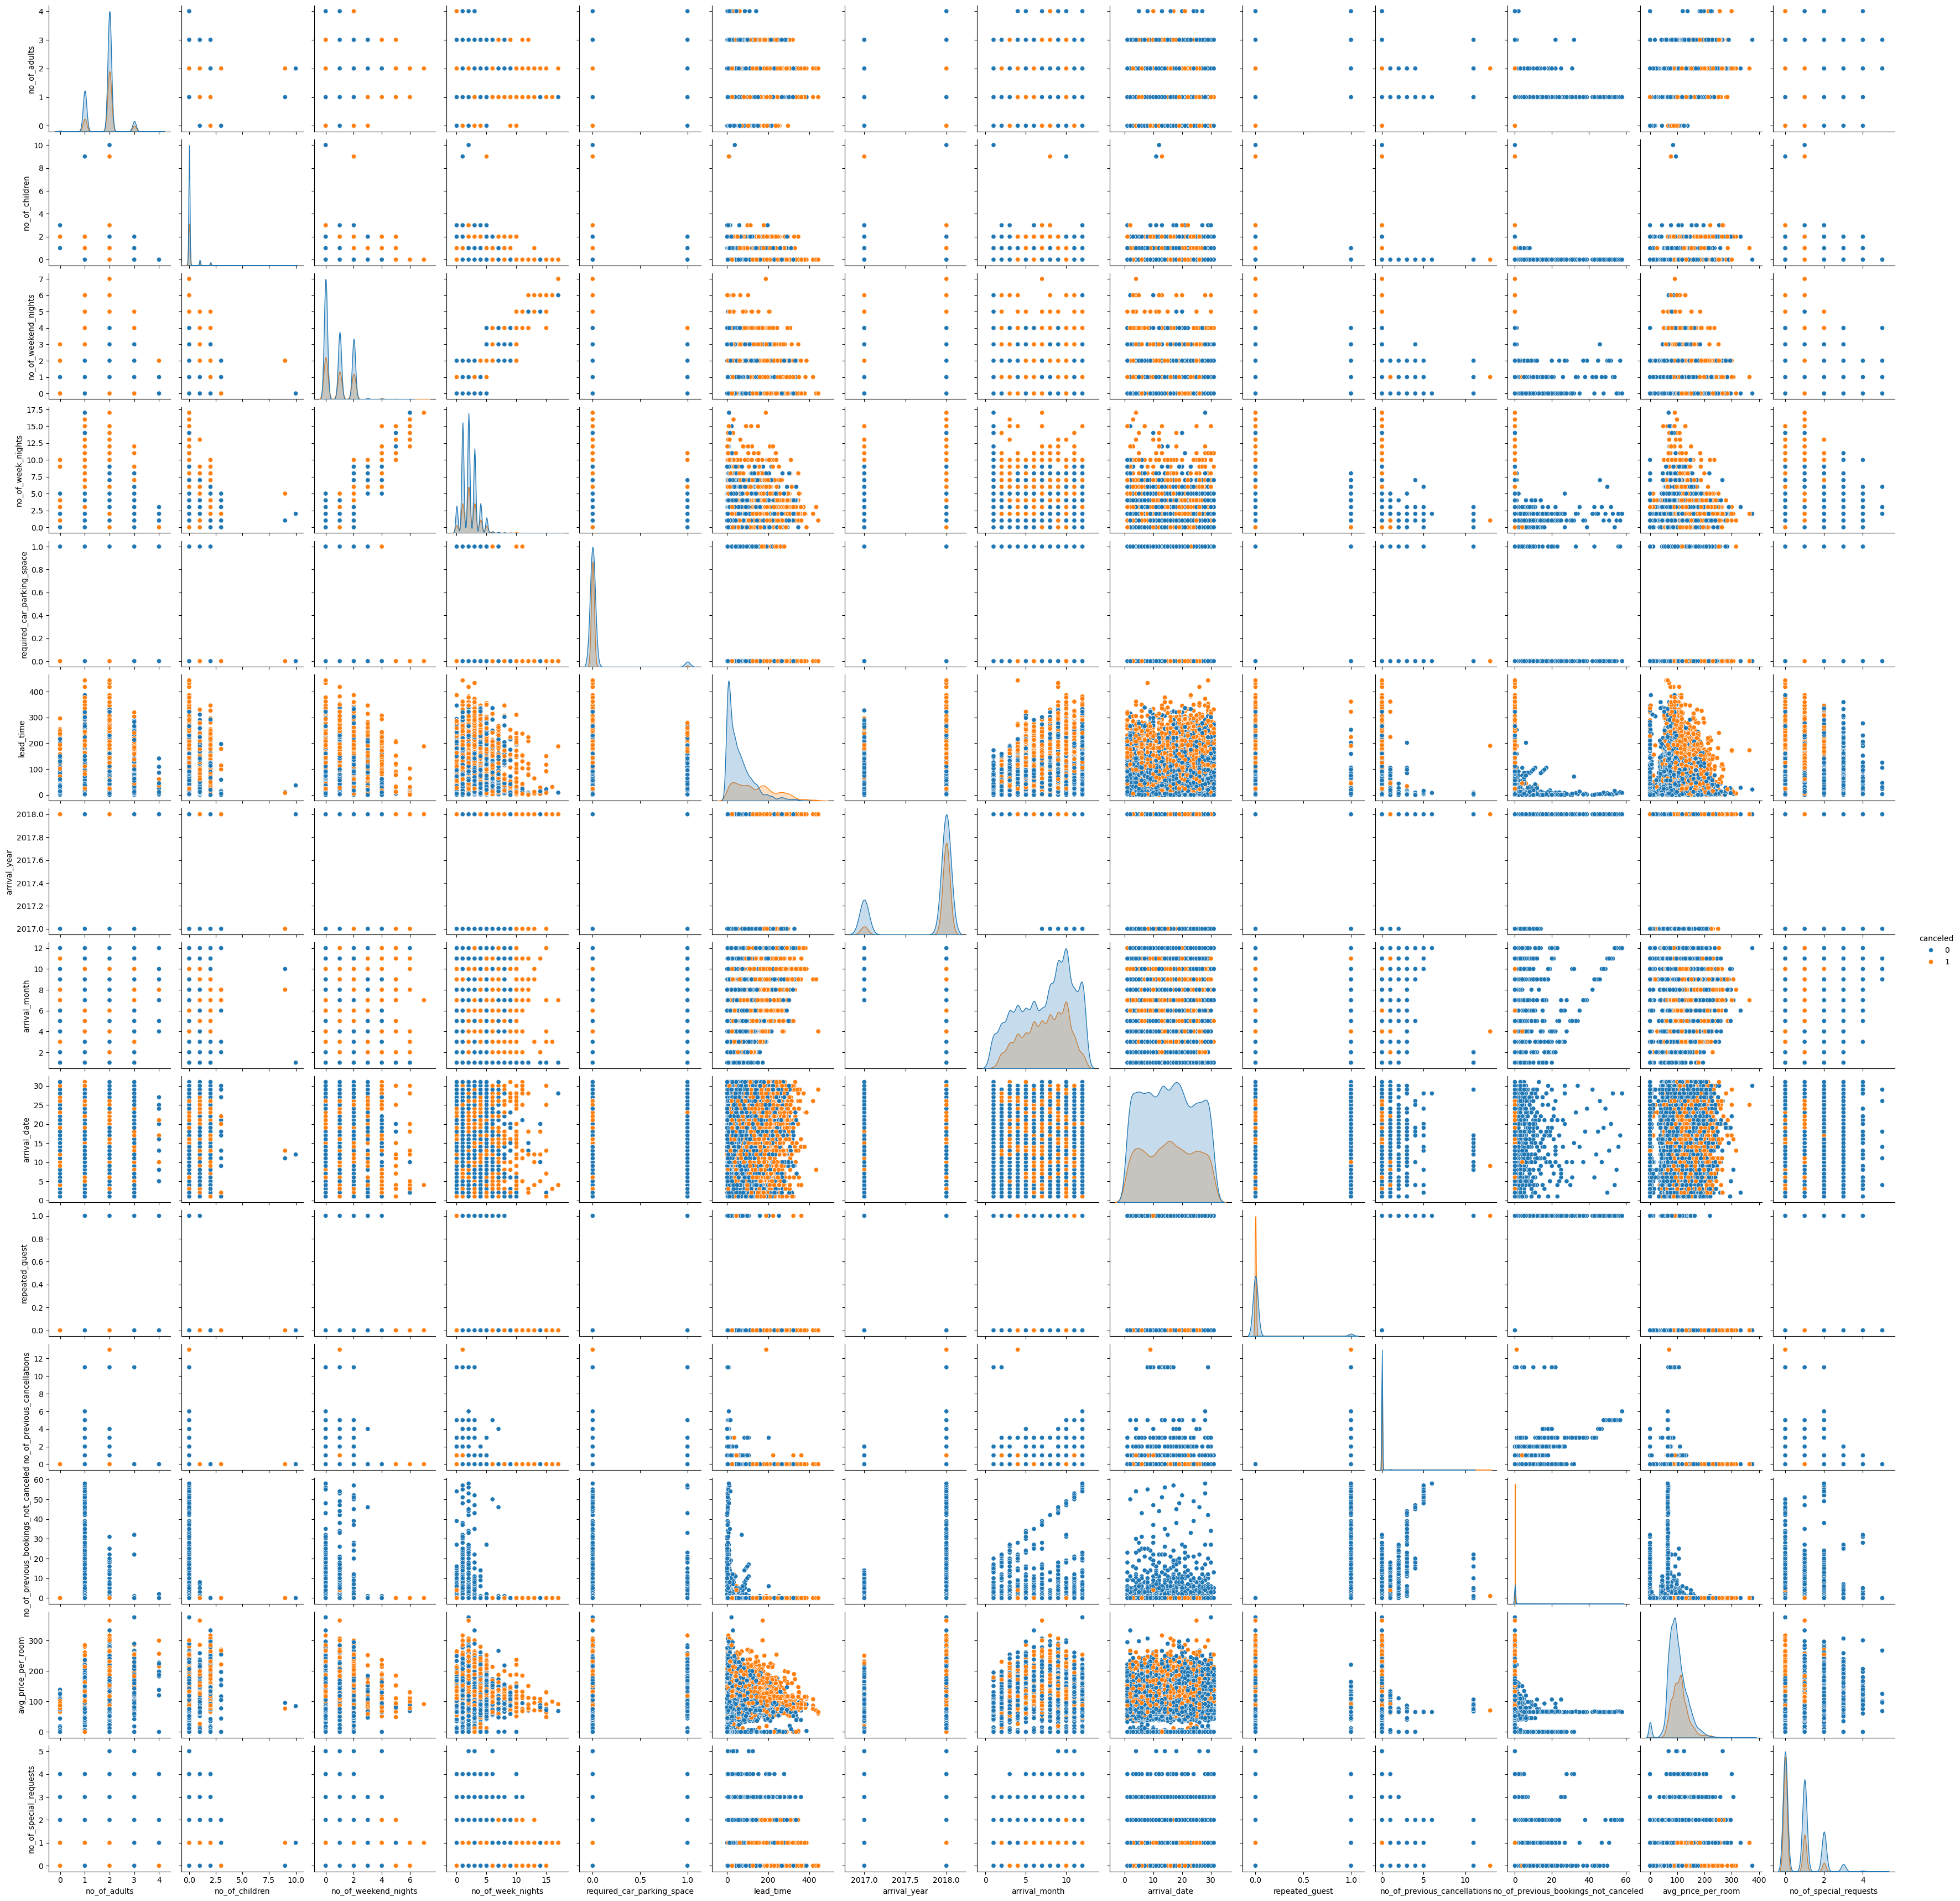

In [145]:
sns.pairplot(data=hd, hue='canceled')

##### Remarques : ######
Fortes disparitées du taux d'annulation à creuser sur :
* Présence d'une place de parking ou non.
* Le lead_time
* Le prix moyen
* Le mois d'arrivée (fin d'année).
* Mix lead_time/prix_moyen (cluster assez visible)
* Année d'arrivée, (biais statistique ???)

#### Mise en avant des remarques : ####

##### Année & Mois d'arrivée ######

<Axes: xlabel='arrival_month', ylabel='Density'>

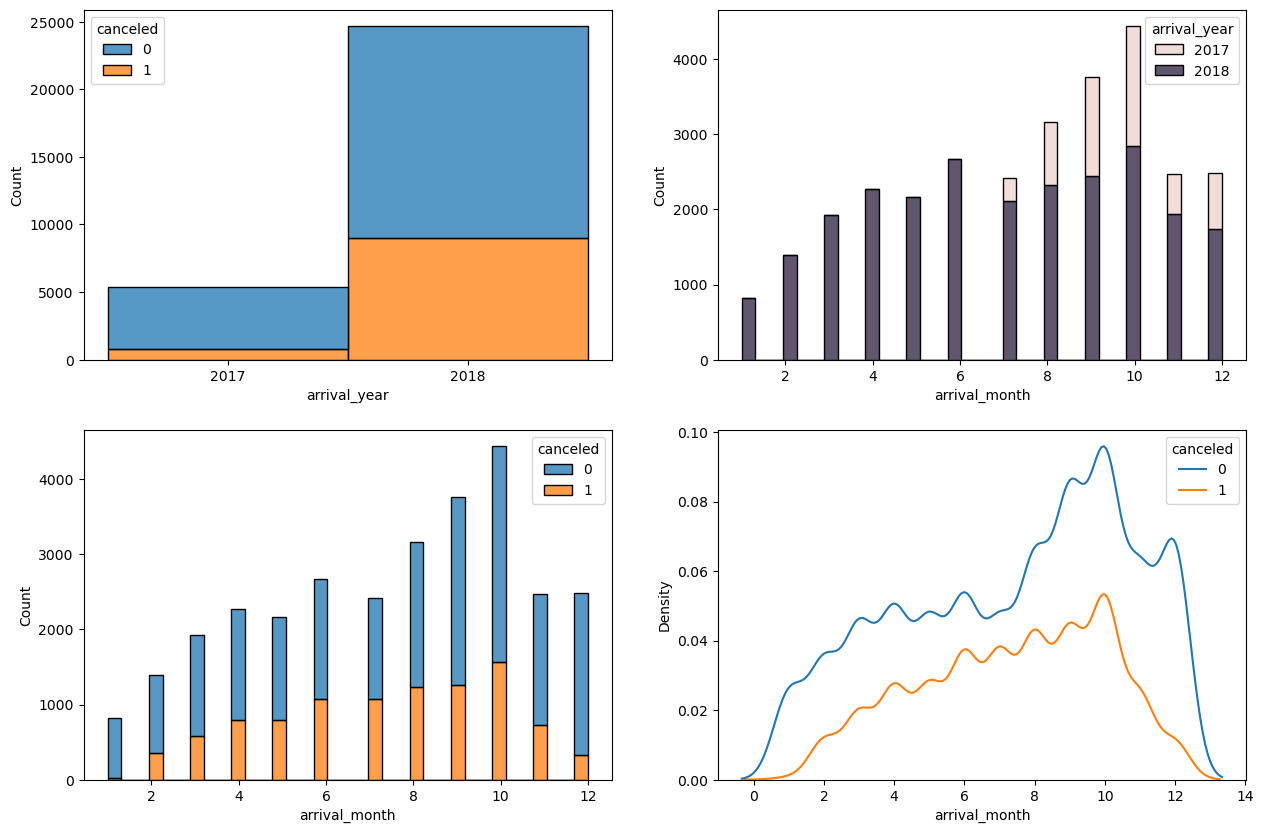

In [146]:
#Étude de la disparité d'annulation entre les années d'arrivée
fig, axes = mlp.subplots(2, 2, figsize=(15,10))
sns.histplot(data=hd, x='arrival_year', hue='canceled', multiple='stack', discrete=True, ax=axes[0,0])
axes[0,0].set_xticks([2017,2018],[2017,2018])


sns.histplot(data=hd, x='arrival_month', hue='arrival_year', multiple='stack', ax=axes[0,1])

sns.histplot(data=hd,x='arrival_month', hue='canceled', multiple='stack', ax=axes[1,0])

sns.kdeplot(data=hd,x='arrival_month', hue='canceled', ax=axes[1,1])

#Même chose dans les données de Test donc on peut les garder sans introduire de biais très important.

##### Parking #####

canceled                        0     1
required_car_parking_space             
0                           19341  9719
1                             843    96

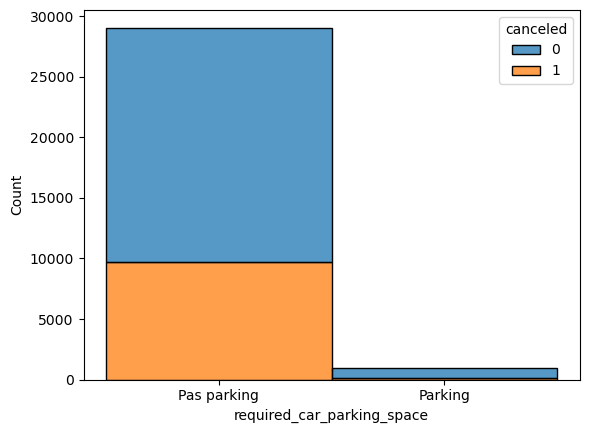

In [148]:
sns.histplot(data=hd, x='required_car_parking_space', hue='canceled', multiple='stack', discrete=True)
mlp.xticks([0,1],['Pas parking', 'Parking'])

parking_canceled = hd.groupby(['required_car_parking_space', 'canceled']).size().unstack()
parking_canceled

#Environ 10% d'annulation si parking contre 33% sinon.

##### Lead_time & Avg_price #####

<Axes: xlabel='avg_price_per_room', ylabel='Density'>

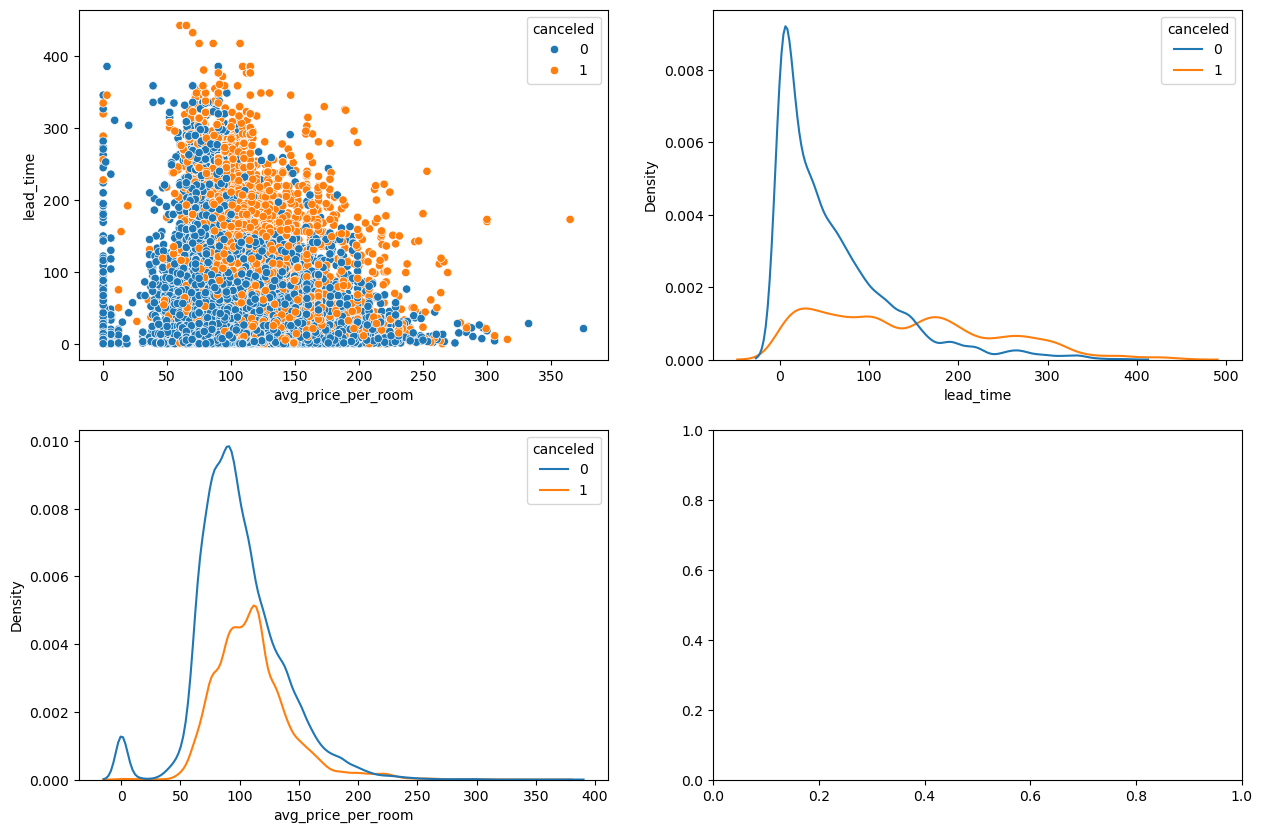

In [150]:
#Étude de la disparité d'annulation selon le prix et l'interval d'arrivée
fig, axes = mlp.subplots(2, 2, figsize=(15,10))
sns.scatterplot(data=hd, x='avg_price_per_room', y='lead_time', hue='canceled', ax=axes[0,0])

sns.kdeplot(data=hd, x='lead_time', hue='canceled', ax=axes[0,1])

sns.kdeplot(data=hd, x='avg_price_per_room', hue='canceled', ax=axes[1,0])
#sns.histplot(data=hd, x='avg_price_per_room', hue='booking_status', multiple='stack')

##### Nombre de requêtes #####

<Axes: xlabel='no_of_special_requests', ylabel='Count'>

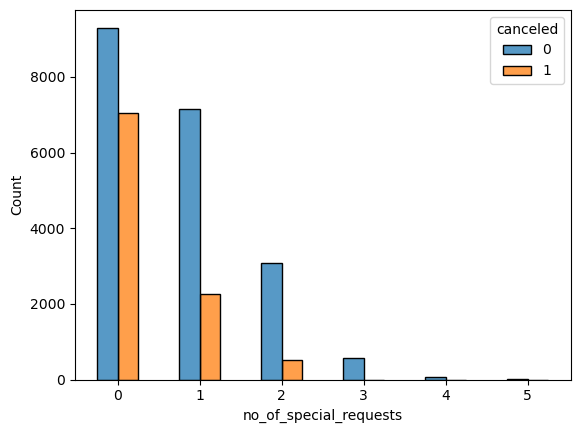

In [152]:
sns.histplot(data=hd, x='no_of_special_requests', hue='canceled', multiple='dodge', discrete=True, shrink=0.5) #, stat='percent')

## Étude du type de room ##

In [154]:
hd.groupby(['room_type_reserved'], as_index=False)['canceled'].describe()

room_type_reserved    count      mean       std  min  25%  50%   75%  max
0        Room_Type 1  23267.0  0.322388  0.467401  0.0  0.0  0.0  1.00  1.0
1        Room_Type 2    581.0  0.344234  0.475527  0.0  0.0  0.0  1.00  1.0
2        Room_Type 3      6.0  0.333333  0.516398  0.0  0.0  0.0  0.75  1.0
3        Room_Type 4   4991.0  0.338008  0.473079  0.0  0.0  0.0  1.00  1.0
4        Room_Type 5    220.0  0.277273  0.448673  0.0  0.0  0.0  1.00  1.0
5        Room_Type 6    801.0  0.416979  0.493367  0.0  0.0  0.0  1.00  1.0
6        Room_Type 7    133.0  0.225564  0.419533  0.0  0.0  0.0  0.00  1.0

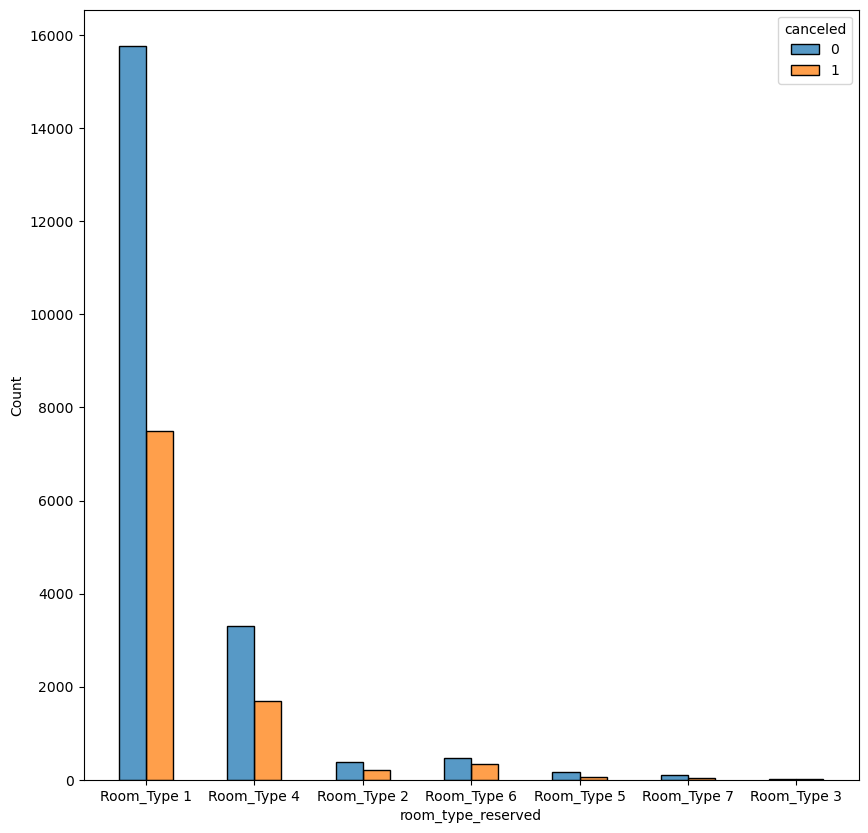

In [155]:
fig = mlp.gcf()

sns.histplot(data=hd, x='room_type_reserved', hue='canceled', multiple='dodge', discrete=True, shrink=0.5)
#mlp.xticks(range(0,7), range(1,8))

fig.set_size_inches(10,10)

#Petite disparité sur le type numéro 6:

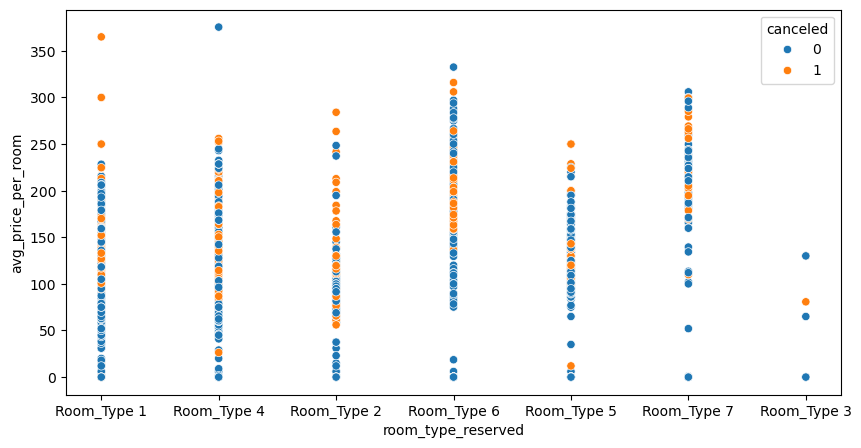

In [156]:
fig = mlp.gcf()

sns.scatterplot(data=hd, x='room_type_reserved', y='avg_price_per_room', hue='canceled')

fig.set_size_inches(10,5)


In [157]:
room_6 = hd[hd['room_type_reserved']=='Room_Type 6']
room_6.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count    801.000000      801.000000            801.000000         801.000000   
mean       1.991261        1.682896              0.882647           2.308365   
std        0.318078        0.695931              0.929361           1.507827   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        2.000000              0.000000           1.000000   
50%        2.000000        2.000000              1.000000           2.000000   
75%        2.000000        2.000000              2.000000           3.000000   
max        4.000000        3.000000              5.000000          10.000000   

       required_car_parking_space   lead_time  arrival_year  arrival_month  \
count                  801.000000  801.000000    801.000000     801.000000   
mean                     0.073658   59.571785   2017.861423       7.494382   
std                      0.261377   63.226360      0.345720       2.868847   
min                      0.000000    0.000000   2017.000000       1.000000   
25%                      0.000000   11.000000   2018.000000       5.000000   
50%                      0.000000   36.000000   2018.000000       8.000000   
75%                      0.000000   85.000000   2018.000000      10.000000   
max                      1.000000  346.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count    801.000000      801.000000                    801.000000   
mean      16.755306        0.009988                      0.007491   
std        8.763278        0.099499                      0.149813   
min        1.000000        0.000000                      0.000000   
25%        9.000000        0.000000                      0.000000   
50%       18.000000        0.000000                      0.000000   
75%       24.000000        0.000000                      0.000000   
max       31.000000        1.000000                      3.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                            801.000000          801.000000   
mean                               0.092385          182.307790   
std                                1.149545           42.470148   
min                                0.000000            0.000000   
25%                                0.000000          159.900000   
50%                                0.000000          183.000000   
75%                                0.000000          207.900000   
max                               20.000000          332.570000   

       no_of_special_requests    canceled  
count              801.000000  801.000000  
mean                 0.902622    0.416979  
std                  0.930326    0.493367  
min                  0.000000    0.000000  
25%                  0.000000    0.000000  
50%                  1.000000    0.000000  
75%                  2.000000    1.000000  
max                  5.000000    1.000000

Conclusion : Drop de cette colonne car catégorielle donc chiant et peu informatif sur une annulation ou non.

## Étude de l'origine de la réservation ##

In [160]:
hd.groupby(['market_segment_type'], as_index=False)['canceled'].describe()


market_segment_type    count      mean       std  min  25%  50%  75%  max
0            Aviation    107.0  0.299065  0.460003  0.0  0.0  0.0  1.0  1.0
1       Complementary    328.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2           Corporate   1658.0  0.110977  0.314199  0.0  0.0  0.0  0.0  1.0
3             Offline   8587.0  0.289391  0.453506  0.0  0.0  0.0  1.0  1.0
4              Online  19319.0  0.368239  0.482339  0.0  0.0  0.0  1.0  1.0

In [161]:
market_canceled = hd.groupby(['canceled','market_segment_type']).size().unstack()
print(market_canceled)

existe = hd[(hd['market_segment_type']=='Complementary')]
existe.describe()

market_segment_type  Aviation  Complementary  Corporate  Offline   Online
canceled                                                                 
0                        75.0          328.0     1474.0   6102.0  12205.0
1                        32.0            NaN      184.0   2485.0   7114.0


no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count    328.000000      328.000000            328.000000         328.000000   
mean       1.493902        0.121951              0.338415           1.253049   
std        0.558471        0.439356              0.624270           1.046323   
min        0.000000        0.000000              0.000000           0.000000   
25%        1.000000        0.000000              0.000000           1.000000   
50%        1.000000        0.000000              0.000000           1.000000   
75%        2.000000        0.000000              1.000000           2.000000   
max        4.000000        3.000000              4.000000          10.000000   

       required_car_parking_space   lead_time  arrival_year  arrival_month  \
count                  328.000000  328.000000    328.000000     328.000000   
mean                     0.085366   12.152439   2017.664634       7.591463   
std                      0.279852   36.911928      0.472840       3.504150   
min                      0.000000    0.000000   2017.000000       1.000000   
25%                      0.000000    0.000000   2017.000000       5.000000   
50%                      0.000000    2.000000   2018.000000       8.000000   
75%                      0.000000    8.000000   2018.000000      10.000000   
max                      1.000000  386.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count    328.000000      328.000000                    328.000000   
mean      15.027439        0.329268                      0.207317   
std        8.798588        0.470666                      0.716563   
min        1.000000        0.000000                      0.000000   
25%        7.000000        0.000000                      0.000000   
50%       15.000000        0.000000                      0.000000   
75%       22.000000        1.000000                      0.000000   
max       31.000000        1.000000                      4.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                            328.000000          328.000000   
mean                               2.448171            3.458628   
std                                5.742997           16.351666   
min                                0.000000            0.000000   
25%                                0.000000            0.000000   
50%                                0.000000            0.000000   
75%                                1.000000            0.000000   
max                               32.000000          170.000000   

       no_of_special_requests  canceled  
count              328.000000     328.0  
mean                 0.878049       0.0  
std                  1.003239       0.0  
min                  0.000000       0.0  
25%                  0.000000       0.0  
50%                  1.000000       0.0  
75%                  1.000000       0.0  
max                  4.000000       0.0

<Axes: xlabel='market_segment_type', ylabel='Count'>

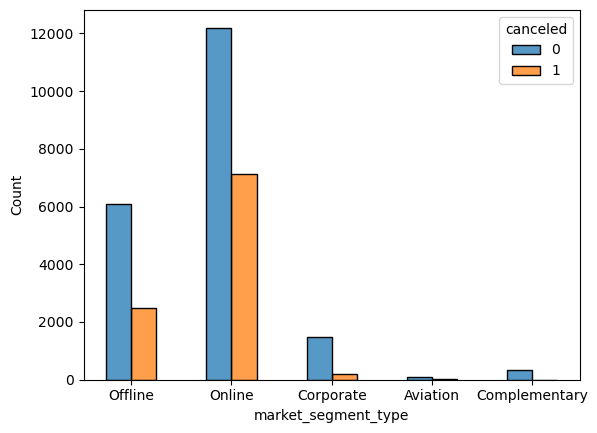

In [162]:
sns.histplot(data=hd, x='market_segment_type', hue='canceled', discrete=True, multiple='dodge', shrink=0.5)
#Disparité de répartition des annulations entre offline/online/corporate/complementary (28% / 36% / 11% / 0%)

Même proportion d'annulation entre Aviation et Offline donc plutot que mettre une colonne en plus avec One Hot, on map Aviation sur Offline

## Étude de la durée du séjour ##

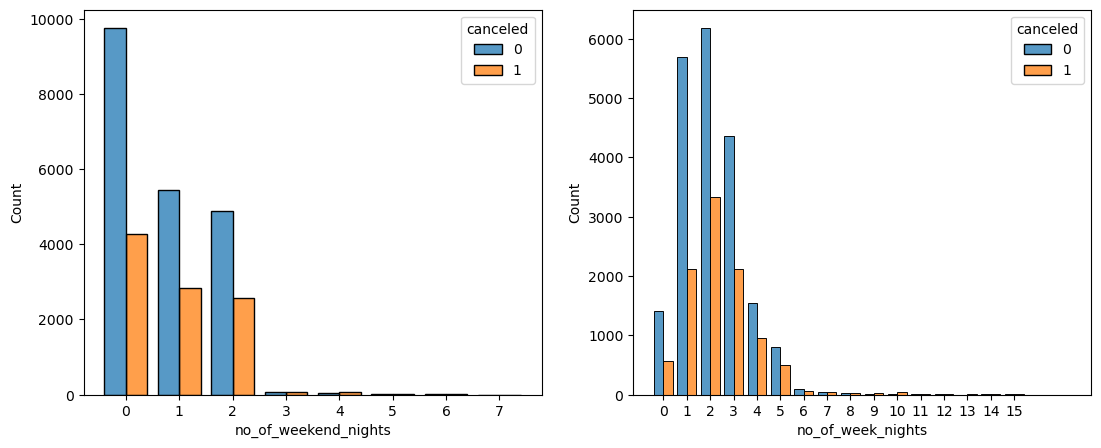

In [175]:
fig, axes = mlp.subplots(1, 2, figsize=(13,5))
sns.histplot(data=hd, x='no_of_weekend_nights', hue='canceled', multiple='dodge', discrete=True, shrink=0.8, ax=axes[0])

sns.histplot(data=hd,x='no_of_week_nights', hue='canceled', multiple='dodge', discrete=True, shrink=0.8, ax=axes[1])
axes[1].set_xticks(range(16),range(16))

In [177]:
hd['no_of_nights'] = hd['no_of_week_nights']+hd['no_of_weekend_nights']

In [179]:
percentages = hd.groupby(['no_of_nights'], as_index=False)['canceled'].describe()
percentages

no_of_nights   count      mean       std  min   25%  50%  75%  max
0              0    67.0  0.029851  0.171460  0.0  0.00  0.0  0.0  1.0
1              1  5467.0  0.226633  0.418691  0.0  0.00  0.0  0.0  1.0
2              2  7027.0  0.341824  0.474355  0.0  0.00  0.0  1.0  1.0
3              3  8290.0  0.355368  0.478654  0.0  0.00  0.0  1.0  1.0
4              4  4911.0  0.328854  0.469845  0.0  0.00  0.0  1.0  1.0
5              5  2142.0  0.311391  0.463170  0.0  0.00  0.0  1.0  1.0
6              6   836.0  0.454545  0.498228  0.0  0.00  0.0  1.0  1.0
7              7   784.0  0.394133  0.488976  0.0  0.00  0.0  1.0  1.0
8              8   143.0  0.398601  0.491331  0.0  0.00  0.0  1.0  1.0
9              9    92.0  0.478261  0.502264  0.0  0.00  0.0  1.0  1.0
10            10    89.0  0.539326  0.501275  0.0  0.00  1.0  1.0  1.0
11            11    36.0  0.416667  0.500000  0.0  0.00  0.0  1.0  1.0
12            12    21.0  0.619048  0.497613  0.0  0.00  1.0  1.0  1.0
13            13    13.0  0.769231  0.438529  0.0  1.00  1.0  1.0  1.0
14            14    24.0  0.875000  0.337832  0.0  1.00  1.0  1.0  1.0
15            15    26.0  0.884615  0.325813  0.0  1.00  1.0  1.0  1.0
16            16     4.0  0.750000  0.500000  0.0  0.75  1.0  1.0  1.0
17            17     5.0  0.800000  0.447214  0.0  1.00  1.0  1.0  1.0
18            18     3.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0
19            19     4.0  0.750000  0.500000  0.0  0.75  1.0  1.0  1.0
20            20     9.0  0.777778  0.440959  0.0  1.00  1.0  1.0  1.0
21            21     3.0  0.666667  0.577350  0.0  0.50  1.0  1.0  1.0
22            22     1.0  1.000000       NaN  1.0  1.00  1.0  1.0  1.0
23            23     1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0
24            24     1.0  1.000000       NaN  1.0  1.00  1.0  1.0  1.0

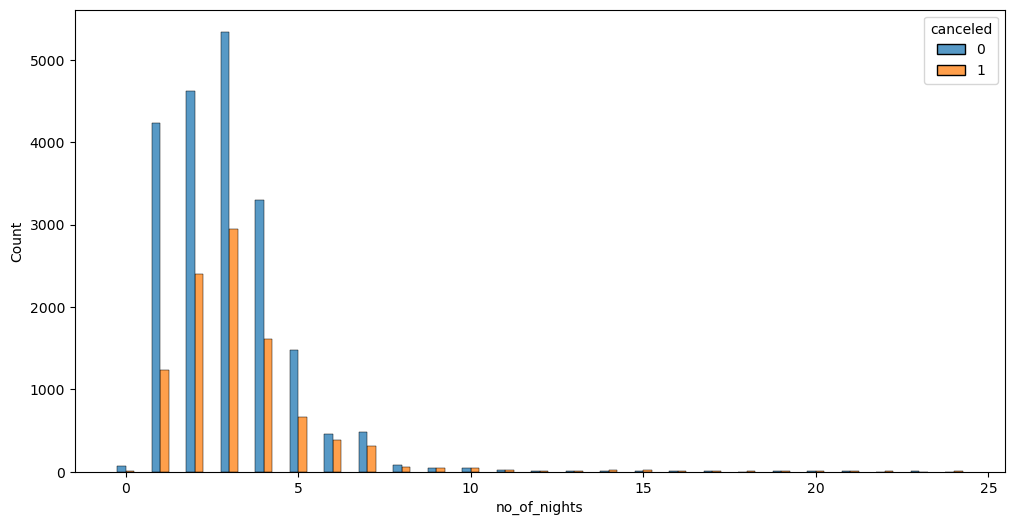

In [181]:
fig = mlp.gcf()
sns.histplot(data=hd, x='no_of_nights', hue='canceled', multiple='dodge', discrete=True, shrink=0.5)
#sns.kdeplot(data=hd, x='no_of_nights', hue='canceled')
fig.set_size_inches(12,6)

# Proportion d'annulation plus petite pour les séjours plus court (inférieurs à 5 jours) et surtout pour 1 jour

## Étude du nombre d'adultes ##

<Axes: xlabel='no_of_adults', ylabel='Count'>

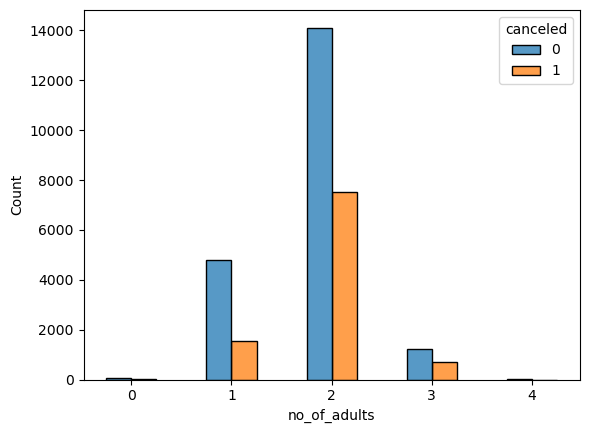

In [184]:
sns.histplot(data=hd, x='no_of_adults', hue='canceled', multiple='dodge', discrete=True, shrink=0.5)
#% d'annulation plus faible si une seule personne.

## Étude du nombre d'enfants ##

In [187]:
child_canceled = hd.groupby(['canceled','no_of_children']).size().unstack()
child_canceled

#Plus de propentation à l'annulation si 2 enfants

no_of_children       0      1      2     3    9    10
canceled                                             
0               18790.0  884.0  496.0  12.0  1.0  1.0
1                8985.0  451.0  374.0   4.0  1.0  NaN

<Axes: xlabel='no_of_children', ylabel='Count'>

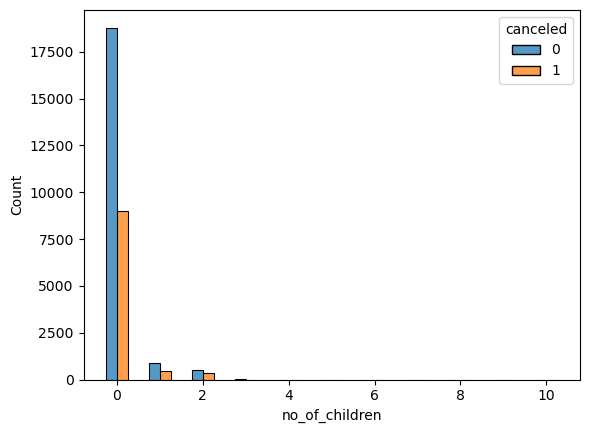

In [189]:
sns.histplot(data=hd, x='no_of_children', hue='canceled', multiple='dodge', discrete=True, shrink=0.5)
#a peu près le même % d'annulation peu importe le nombre d'enfants.

## Étude du nombre de personnes ##

In [192]:
hd['no_of_persons']=hd['no_of_adults']+hd['no_of_children']

<Axes: xlabel='no_of_persons', ylabel='Count'>

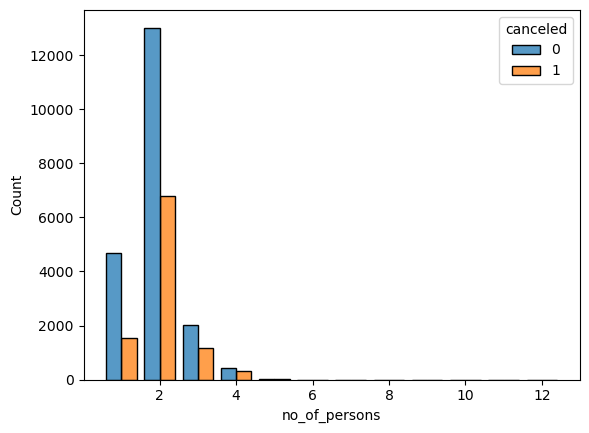

In [194]:
sns.histplot(data=hd, x='no_of_persons', hue='canceled', multiple='dodge', discrete=True, shrink=0.8)

## Étude des plats ##

<Axes: xlabel='type_of_meal_plan', ylabel='Count'>

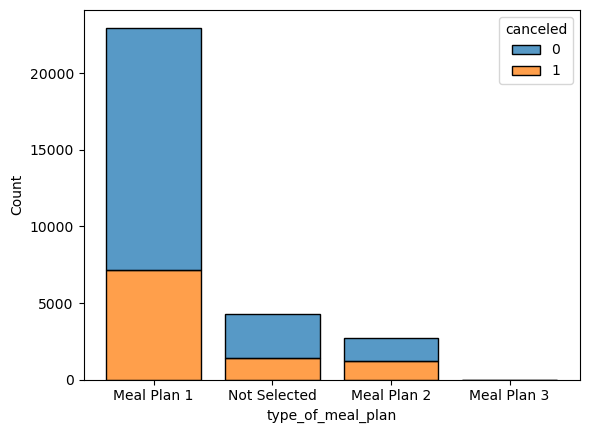

In [197]:
sns.histplot(data=hd, x='type_of_meal_plan', hue='canceled', multiple='stack', discrete=True, shrink=0.8)
#Même proportion sauf pour 'Meal Plan 2' avec plus d'annulation
# -> One Hot

<Axes: xlabel='type_of_meal_plan', ylabel='Count'>

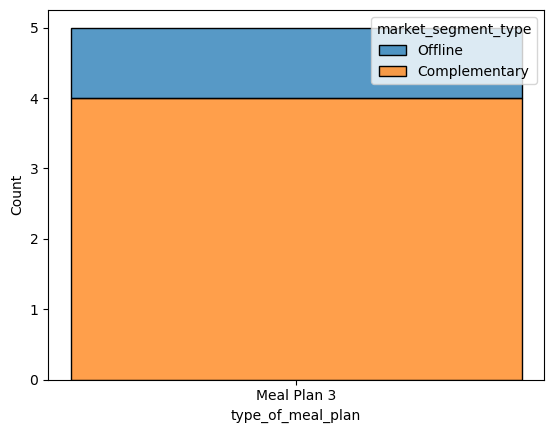

In [199]:
sns.histplot(data=hd[hd['type_of_meal_plan']=='Meal Plan 3'], x='type_of_meal_plan', hue='market_segment_type', multiple='stack', discrete=True, shrink=0.8)

## Étude du temps avant réservation ##

<Axes: xlabel='lead_time', ylabel='Density'>

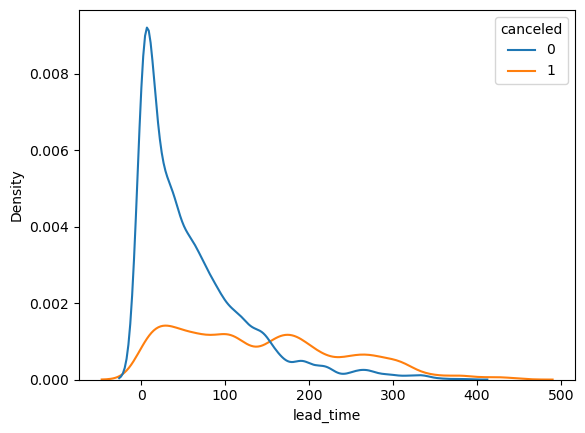

In [202]:
sns.kdeplot(data=hd, x='lead_time', hue='canceled')

## Étude des périodes d'arrivées ##

<Axes: xlabel='arrival_month', ylabel='Count'>

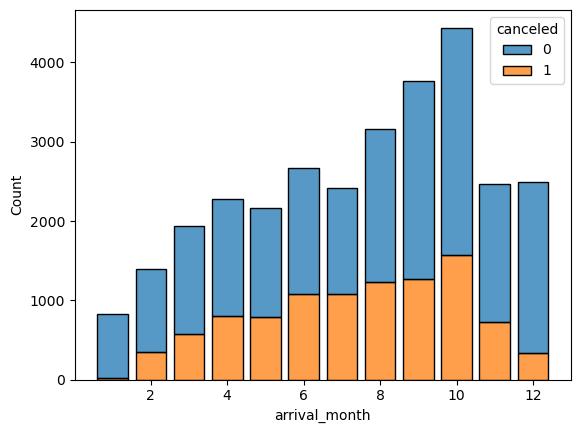

In [205]:
sns.histplot(data=hd, x='arrival_month', hue='canceled', multiple='stack', discrete=True, shrink=0.8)
#Quasi aucune annulation en janvier, et moins d'annulation en Décembre

<Axes: xlabel='arrival_date', ylabel='Density'>

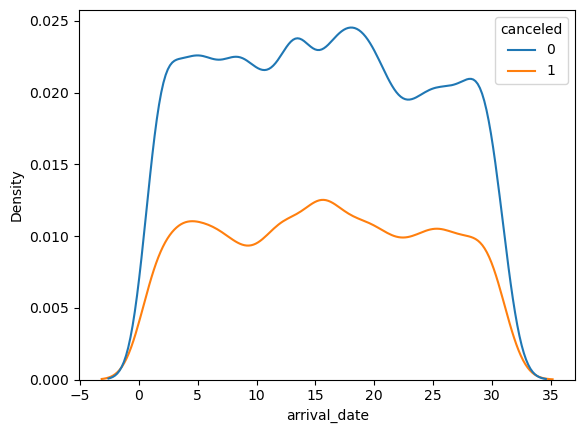

In [207]:
#sns.histplot(data=hd, x='arrival_date', hue='canceled', multiple='stack', discrete=True, shrink=0.8)
sns.kdeplot(data=hd, x='arrival_date', hue='canceled')
#Très peu d'impact, courbes se suivants donc pas de variations anormales selon le jour du mois.

## Étude des clients habituels ##

([<matplotlib.axis.XTick at 0x31fa309e0>,
 [Text(0, 0, 'Non régulier'), Text(1, 0, 'Régulier')])

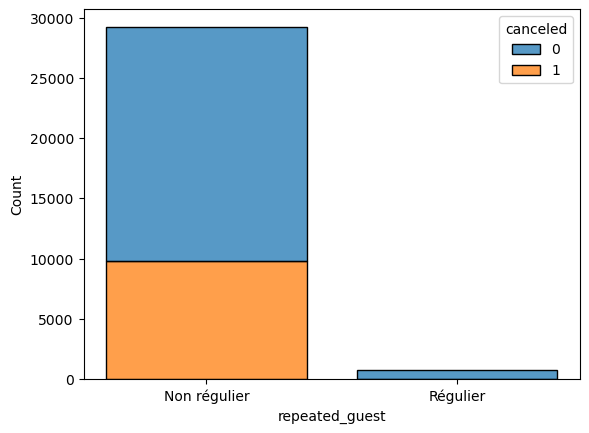

In [210]:
sns.histplot(data=hd, x='repeated_guest', hue='canceled', multiple='stack', discrete=True, shrink=0.8)
mlp.xticks([0,1],['Non régulier','Régulier'])

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count    770.000000      770.000000            770.000000         770.000000   
mean       1.227273        0.010390              0.435065           1.336364   
std        0.437553        0.101464              0.675845           1.048798   
min        1.000000        0.000000              0.000000           0.000000   
25%        1.000000        0.000000              0.000000           1.000000   
50%        1.000000        0.000000              0.000000           1.000000   
75%        1.000000        0.000000              1.000000           2.000000   
max        4.000000        1.000000              4.000000           8.000000   

       required_car_parking_space   lead_time  arrival_year  arrival_month  \
count                  770.000000  770.000000    770.000000     770.000000   
mean                     0.151948   14.040260   2017.776623       7.545455   
std                      0.359204   39.126479      0.416779       3.690023   
min                      0.000000    0.000000   2017.000000       1.000000   
25%                      0.000000    1.000000   2018.000000       4.000000   
50%                      0.000000    4.000000   2018.000000       9.000000   
75%                      0.000000   12.000000   2018.000000      11.000000   
max                      1.000000  361.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count    770.000000           770.0                    770.000000   
mean      14.463636             1.0                      0.884416   
std        8.474200             0.0                      2.025428   
min        1.000000             1.0                      0.000000   
25%        7.000000             1.0                      0.000000   
50%       14.000000             1.0                      0.000000   
75%       21.000000             1.0                      1.000000   
max       31.000000             1.0                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                            770.000000          770.000000   
mean                               6.044156           65.208792   
std                                9.317161           32.114651   
min                                0.000000            0.000000   
25%                                1.000000           65.000000   
50%                                3.000000           66.000000   
75%                                7.000000           80.000000   
max                               58.000000          220.000000   

       no_of_special_requests    canceled  no_of_nights  no_of_persons  
count              770.000000  770.000000    770.000000     770.000000  
mean                 0.558442    0.019481      1.771429       1.237662  
std                  0.786649    0.138296      1.198054       0.466718  
min                  0.000000    0.000000      0.000000       1.000000  
25%                  0.000000    0.000000      1.000000       1.000000  
50%                  0.000000    0.000000      1.000000       1.000000  
75%                  1.000000    0.000000      2.000000       1.000000  
max                  4.000000    1.000000     12.000000       4.000000

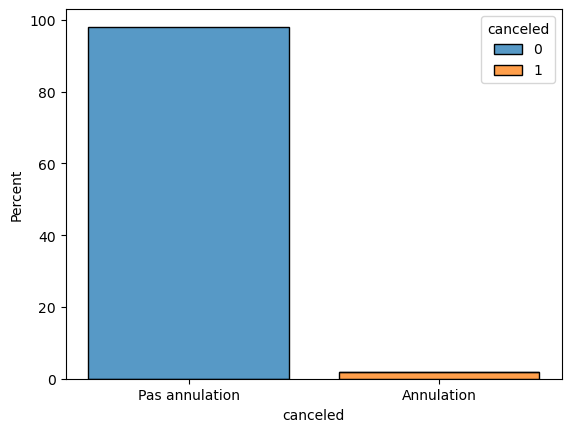

In [212]:
sns.histplot(data=hd[hd['repeated_guest']==1], x='canceled', hue='canceled', multiple='stack', discrete=True, shrink=0.8, stat='percent')
mlp.xticks([0,1],['Pas annulation','Annulation'])

hd[hd['repeated_guest']==1].describe()
#Seulement 2% d'annulation chez les réguliers

<Axes: xlabel='no_of_previous_bookings_not_canceled', ylabel='Percent'>

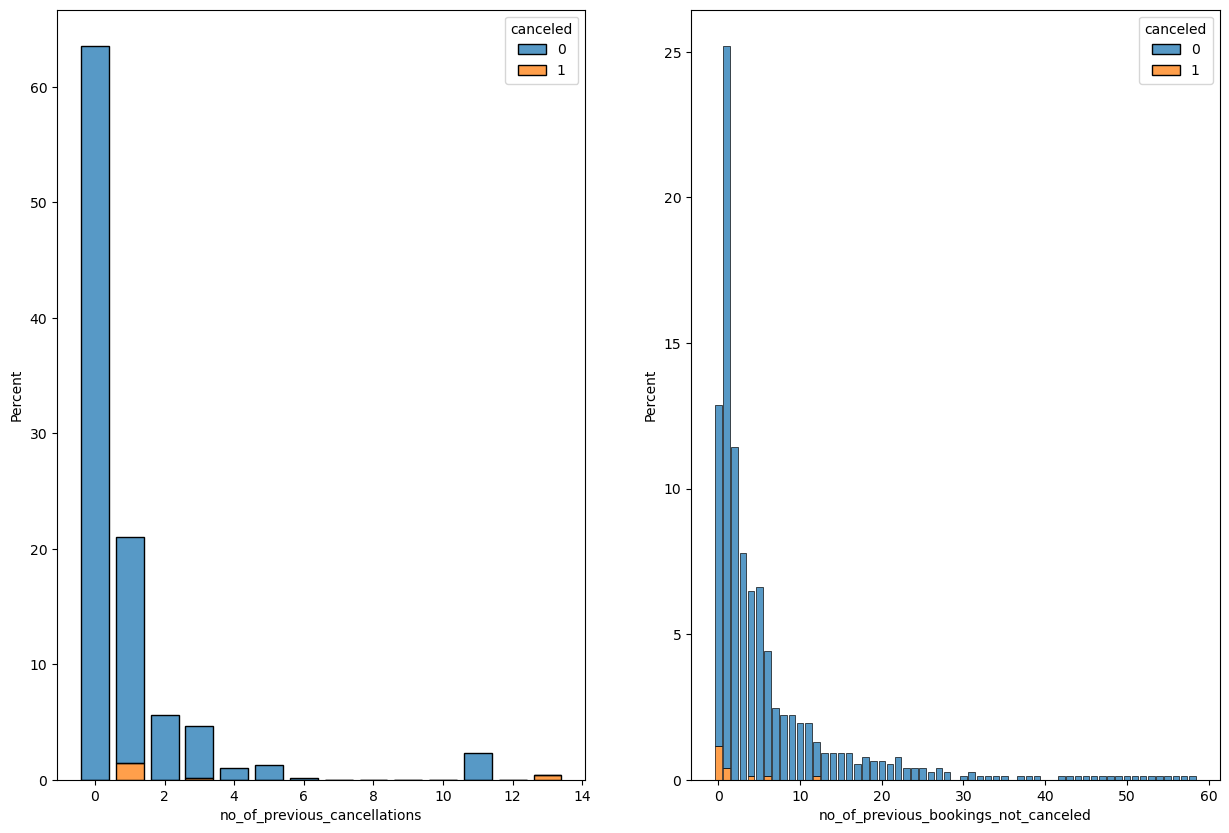

In [214]:
hd[hd['repeated_guest']==1]

fig, axes = mlp.subplots(1, 2, figsize=(15,10))
sns.histplot(data=hd[hd['repeated_guest']==1], x='no_of_previous_cancellations', hue='canceled', multiple='stack', discrete=True, shrink=0.8, stat='percent', ax=axes[0])
sns.histplot(data=hd[hd['repeated_guest']==1], x='no_of_previous_bookings_not_canceled', hue='canceled', multiple='stack', discrete=True, shrink=0.8, stat='percent', ax=axes[1])


#Plus de propention à annuler si c'est la première fois.
#Previous_cancellations osef

## Étude du prix ##

<Axes: xlabel='avg_price_per_room', ylabel='Density'>

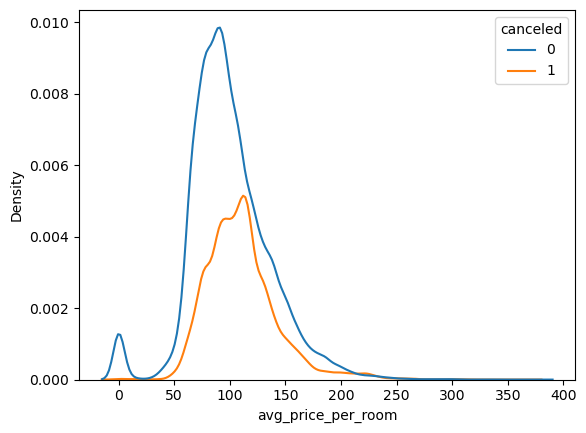

In [217]:
sns.kdeplot(data=hd, x='avg_price_per_room', hue='canceled')

# Transformation et choix des données #

### Choix ###


Voici la liste des attributs gardés / modifiés / virés : <br>
Gardés :
* 'no_of_adults',
* 'no_of_children',
* 'required_car_parking_space',
* 'lead_time',
* 'arrival_year',
* 'arrival_month',
* 'repeated_guest',
* 'no_of_previous_bookings_not_canceled',
* 'avg_price_per_room',
* 'no_of_special_requests',
* 'canceled'
<br>

Modifiés : <br>
* 'room_type_reserved' -> juste le numéro du type de chambre. <br>

   OneHot :
* 'type_of_meal_plan'
* 'market_segment_type'

<br>
  Combinés : <br>
  
* 'no_of_weekend_nights' & 'no_of_week_nights'


<br>

Virés :
* 'Booking_ID'
* 'arrival_date'
* 'no_of_previous_cancellations'

### Import clean ###

In [421]:
hd = pd.read_csv('Hotel Reservations.csv')
hdTest = pd.read_csv('Donnees_test.csv')

hd

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
29994   INN29995             2               0                     0   
29995   INN29996             2               0                     0   
29996   INN29997             2               0                     0   
29997   INN29998             1               0                     0   
29998   INN29999             1               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
29994                  2       Meal Plan 1                           0   
29995                  3       Meal Plan 1                           0   
29996                  2       Meal Plan 1                           0   
29997                  2       Meal Plan 1                           0   
29998                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
2            Room_Type 1          1          2018              2   
3            Room_Type 1        211          2018              5   
4            Room_Type 1         48          2018              4   
...                  ...        ...           ...            ...   
29994        Room_Type 1        322          2018             12   
29995        Room_Type 1         91          2018              5   
29996        Room_Type 1         24          2018              4   
29997        Room_Type 1        266          2018             12   
29998        Room_Type 1          3          2018              7   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
2                28              Online               0   
3                20              Online               0   
4                11              Online               0   
...             ...                 ...             ...   
29994             9             Offline               0   
29995            11             Offline               0   
29996            21              Online               0   
29997             2             Offline               0   
29998            11           Corporate               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
29994                             0                                     0   
29995                             0                                     0   
29996                            

### Modifications ###

In [424]:
#Transformation de la colonne Annulé ou non
hd['canceled']= hd['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})
hd = hd.drop(['booking_status'], axis='columns')

#hdTest['canceled']= hdTest['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})
#hdTest = hdTest.drop(['booking_status'], axis='columns')

In [426]:
#Combinaison de colonnes :
hd['no_of_nights'] = hd['no_of_week_nights'] + hd['no_of_weekend_nights']

hdTest['no_of_nights'] = hdTest['no_of_week_nights'] + hdTest['no_of_weekend_nights']

In [428]:
#Drop de colonnes :
hd = hd.drop(['no_of_week_nights','no_of_weekend_nights'],axis='columns')
hd = hd.drop(['Booking_ID','arrival_date','no_of_previous_cancellations'],axis='columns')

hdTest = hdTest.drop(['no_of_week_nights','no_of_weekend_nights'],axis='columns')
hdTest = hdTest.drop(['Booking_ID','arrival_date','no_of_previous_cancellations'],axis='columns')

In [430]:
hd

no_of_adults  no_of_children type_of_meal_plan  \
0                 2               0       Meal Plan 1   
1                 2               0      Not Selected   
2                 1               0       Meal Plan 1   
3                 2               0       Meal Plan 1   
4                 2               0      Not Selected   
...             ...             ...               ...   
29994             2               0       Meal Plan 1   
29995             2               0       Meal Plan 1   
29996             2               0       Meal Plan 1   
29997             1               0       Meal Plan 1   
29998             1               0       Meal Plan 1   

       required_car_parking_space room_type_reserved  lead_time  arrival_year  \
0                               0        Room_Type 1        224          2017   
1                               0        Room_Type 1          5          2018   
2                               0        Room_Type 1          1          2018   
3                               0        Room_Type 1        211          2018   
4                               0        Room_Type 1         48          2018   
...                           ...                ...        ...           ...   
29994                           0        Room_Type 1        322          2018   
29995                           0        Room_Type 1         91          2018   
29996                           0        Room_Type 1         24          2018   
29997                           0        Room_Type 1        266          2018   
29998                           0        Room_Type 1          3          2018   

       arrival_month market_segment_type  repeated_guest  \
0                 10             Offline               0   
1                 11              Online               0   
2                  2              Online               0   
3                  5              Online               0   
4                  4              Online               0   
...              ...                 ...             ...   
29994             12             Offline               0   
29995              5             Offline               0   
29996              4              Online               0   
29997             12             Offline               0   
29998              7           Corporate               0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               94.50   
...                                     ...                 ...   
29994                                     0               52.00   
29995                                     0               75.00   
29996                                     0              117.00   
29997                                     0               75.00   
29998                                     0              118.15   

       no_of_special_requests  canceled  no_of_nights  
0                           0         0             3  
1                           1         0             5  
2                           0         1             3  
3                           0         1             2  
4                           0         1             2  
...                       ...       ...           ...  
29994                       0         0             2  
29995                       0         0             3  
29996                       0         1             2  
29997                       0         0             2  
29998                       0         0             3  

[29999 rows x 15 columns]

In [432]:
#Garder seulement le numéro du type de chambre (en le transformant en int).
hd['room_type_reserved'] = hd['room_type_reserved'].str.split(pat= " ", expand=True)[1].apply(lambda x: int(x))

hdTest['room_type_reserved'] = hdTest['room_type_reserved'].str.split(pat= " ", expand=True)[1].apply(lambda x: int(x))


In [434]:
#Transformer les meal_plans avec seulement le numéro
mapping_names = {'Not Selected': 'Meal Plan 0', 'Meal Plan 1': 'Meal Plan 1', 'Meal Plan 2': 'Meal Plan 2', 'Meal Plan 3': 'Meal Plan 3'}
hd['type_of_meal_plan']= hd['type_of_meal_plan'].map(mapping_names)
hd['type_of_meal_plan'] = hd['type_of_meal_plan'].str.split(pat= " ", expand=True)[2].apply(lambda x: int(x))

hdTest['type_of_meal_plan']= hdTest['type_of_meal_plan'].map(mapping_names)
hdTest['type_of_meal_plan'] = hdTest['type_of_meal_plan'].str.split(pat= " ", expand=True)[2].apply(lambda x: int(x))

hd

no_of_adults  no_of_children  type_of_meal_plan  \
0                 2               0                  1   
1                 2               0                  0   
2                 1               0                  1   
3                 2               0                  1   
4                 2               0                  0   
...             ...             ...                ...   
29994             2               0                  1   
29995             2               0                  1   
29996             2               0                  1   
29997             1               0                  1   
29998             1               0                  1   

       required_car_parking_space  room_type_reserved  lead_time  \
0                               0                   1        224   
1                               0                   1          5   
2                               0                   1          1   
3                               0                   1        211   
4                               0                   1         48   
...                           ...                 ...        ...   
29994                           0                   1        322   
29995                           0                   1         91   
29996                           0                   1         24   
29997                           0                   1        266   
29998                           0                   1          3   

       arrival_year  arrival_month market_segment_type  repeated_guest  \
0              2017             10             Offline               0   
1              2018             11              Online               0   
2              2018              2              Online               0   
3              2018              5              Online               0   
4              2018              4              Online               0   
...             ...            ...                 ...             ...   
29994          2018             12             Offline               0   
29995          2018              5             Offline               0   
29996          2018              4              Online               0   
29997          2018             12             Offline               0   
29998          2018              7           Corporate               0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               94.50   
...                                     ...                 ...   
29994                                     0               52.00   
29995                                     0               75.00   
29996                                     0              117.00   
29997                                     0               75.00   
29998                                     0              118.15   

       no_of_special_requests  canceled  no_of_nights  
0                           0         0             3  
1                           1         0             5  
2                           0         1             3  
3                           0         1             2  
4                           0         1             2  
...                       ...       ...           ...  
29994                       0         0             2  
29995                       0         0             3  
29996                       0         1             2  
29997                       0         0             2  
29998                       0         0             3  

[29999 rows x 15 columns]

In [436]:
#Transformer les market_segment en mappant 'Aviation' sur 'Offline' car même proportion et très faible effectif
mapping_names = {'Offline': 'Offline', 'Aviation': 'Offline', 'Online': 'Online', 'Corporate': 'Corporate', 'Complementary':'Complementary'}
hd['market_segment_type']= hd['market_segment_type'].map(mapping_names)

hdTest['market_segment_type']= hd['market_segment_type'].map(mapping_names)

hd

no_of_adults  no_of_children  type_of_meal_plan  \
0                 2               0                  1   
1                 2               0                  0   
2                 1               0                  1   
3                 2               0                  1   
4                 2               0                  0   
...             ...             ...                ...   
29994             2               0                  1   
29995             2               0                  1   
29996             2               0                  1   
29997             1               0                  1   
29998             1               0                  1   

       required_car_parking_space  room_type_reserved  lead_time  \
0                               0                   1        224   
1                               0                   1          5   
2                               0                   1          1   
3                               0                   1        211   
4                               0                   1         48   
...                           ...                 ...        ...   
29994                           0                   1        322   
29995                           0                   1         91   
29996                           0                   1         24   
29997                           0                   1        266   
29998                           0                   1          3   

       arrival_year  arrival_month market_segment_type  repeated_guest  \
0              2017             10             Offline               0   
1              2018             11              Online               0   
2              2018              2              Online               0   
3              2018              5              Online               0   
4              2018              4              Online               0   
...             ...            ...                 ...             ...   
29994          2018             12             Offline               0   
29995          2018              5             Offline               0   
29996          2018              4              Online               0   
29997          2018             12             Offline               0   
29998          2018              7           Corporate               0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               94.50   
...                                     ...                 ...   
29994                                     0               52.00   
29995                                     0               75.00   
29996                                     0              117.00   
29997                                     0               75.00   
29998                                     0              118.15   

       no_of_special_requests  canceled  no_of_nights  
0                           0         0             3  
1                           1         0             5  
2                           0         1             3  
3                           0         1             2  
4                           0         1             2  
...                       ...       ...           ...  
29994                       0         0             2  
29995                       0         0             3  
29996                       0         1             2  
29997                       0         0             2  
29998                       0         0             3  

[29999 rows x 15 columns]

In [438]:
# OneHot

from sklearn.preprocessing import OneHotEncoder
cols_to_encode = ['type_of_meal_plan','market_segment_type']

encoder = OneHotEncoder(drop='if_binary', sparse_output=False).set_output(transform='pandas')

for col in cols_to_encode:
    encoded = encoder.fit_transform(hd[[col]])
    hd = pd.concat([hd, encoded], axis=1)
    hd = hd.drop([col], axis='columns')

for col in cols_to_encode:
    encoded = encoder.fit_transform(hdTest[[col]])
    hdTest = pd.concat([hdTest, encoded], axis=1)
    hdTest = hdTest.drop([col], axis='columns')

hd

no_of_adults  no_of_children  required_car_parking_space  \
0                 2               0                           0   
1                 2               0                           0   
2                 1               0                           0   
3                 2               0                           0   
4                 2               0                           0   
...             ...             ...                         ...   
29994             2               0                           0   
29995             2               0                           0   
29996             2               0                           0   
29997             1               0                           0   
29998             1               0                           0   

       room_type_reserved  lead_time  arrival_year  arrival_month  \
0                       1        224          2017             10   
1                       1          5          2018             11   
2                       1          1          2018              2   
3                       1        211          2018              5   
4                       1         48          2018              4   
...                   ...        ...           ...            ...   
29994                   1        322          2018             12   
29995                   1         91          2018              5   
29996                   1         24          2018              4   
29997                   1        266          2018             12   
29998                   1          3          2018              7   

       repeated_guest  no_of_previous_bookings_not_canceled  \
0                   0                                     0   
1                   0                                     0   
2                   0                                     0   
3                   0                                     0   
4                   0                                     0   
...               ...                                   ...   
29994               0                                     0   
29995               0                                     0   
29996               0                                     0   
29997               0                                     0   
29998               0                                     0   

       avg_price_per_room  ...  canceled  no_of_nights  type_of_meal_plan_0  \
0                   65.00  ...         0             3                  0.0   
1                  106.68  ...         0             5                  1.0   
2                   60.00  ...         1             3                  0.0   
3                  100.00  ...         1             2                  0.0   
4                   94.50  ...         1             2                  1.0   
...                   ...  ...       ...           ...                  ...   
29994               52.00  ...         0             2                  0.0   
29995               75.00  ...         0             3                  0.0   
29996              117.00  ...         1             2                  0.0   
29997               75.00  ...         0             2                  0.0   
29998              118.15  ...         0             3                  0.0   

       type_of_meal_plan_1  type_of_meal_plan_2  type_of_meal_plan_3  \
0                      1.0                  0.0                  0.0   
1                      0.0                  0.0                  0.0   
2                      1.0                  0.0                  0.0   
3                      1.0                  0.0                  0.0   
4                      0.0                  0.0                  0.0   
...                    ...                  ...                  ...   
29994                  1.0                  0.0                  0.0   
29995                  1.0                  0.0                  0.0   
29996              

In [440]:
#Il n'y a pas de Meal Plan 3 dans les données de Test donc on rajoute la colonne à la main (remplie de 0 donc ...)

hdTest['type_of_meal_plan_3'] = 0.0
hdTest

no_of_adults  no_of_children  required_car_parking_space  \
0                1               0                           0   
1                2               0                           0   
2                1               0                           0   
3                2               0                           0   
4                2               0                           0   
...            ...             ...                         ...   
6271             3               0                           0   
6272             2               0                           0   
6273             2               0                           0   
6274             2               0                           0   
6275             2               0                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0                      1          7          2017             10   
1                      1        102          2017             10   
2                      1         96          2018             11   
3                      1        118          2018              4   
4                      1         25          2018              1   
...                  ...        ...           ...            ...   
6271                   4         85          2018              8   
6272                   1        228          2018             10   
6273                   1        148          2018              7   
6274                   1         63          2018              4   
6275                   1        207          2018             12   

      repeated_guest  no_of_previous_bookings_not_canceled  \
0                  0                                     0   
1                  0                                     0   
2                  0                                     0   
3                  0                                     0   
4                  0                                     0   
...              ...                                   ...   
6271               0                                     0   
6272               0                                     0   
6273               0                                     0   
6274               0                                     0   
6275               0                                     0   

      avg_price_per_room  no_of_special_requests  no_of_nights  \
0                 126.00                       1             3   
1                 101.50                       0             2   
2                  79.00                       1             5   
3                  97.75                       1             5   
4                  40.67                       0             3   
...                  ...                     ...           ...   
6271              167.80                       1             8   
6272               90.95                       2             4   
6273               98.39                       2             8   
6274               94.50                       0             3   
6275              161.67                       0             3   

      type_of_meal_plan_0  type_of_meal_plan_1  type_of_meal_plan_2  \
0                     0.0                  1.0                  0.0   
1                     0.0                  0.0                  1.0   
2                     0.0                  1.0                  0.0   
3                     0.0                  1.0                  0.0   
4                     0.0                  1.0                  0.0   
...                   ...                  ...                  ...   
6271                  0.0                  1.0                  0.0   
6272                  0.0                  1.0                  0.0   
6273                  0.0                  1.0                  0.0   
6274                  1.0                  0.0                  0.0   
6275                  0.0                  1.0                  0.0   

     

In [442]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   required_car_parking_space            29999 non-null  int64  
 3   room_type_reserved                    29999 non-null  int64  
 4   lead_time                             29999 non-null  int64  
 5   arrival_year                          29999 non-null  int64  
 6   arrival_month                         29999 non-null  int64  
 7   repeated_guest                        29999 non-null  int64  
 8   no_of_previous_bookings_not_canceled  29999 non-null  int64  
 9   avg_price_per_room                    29999 non-null  float64
 10  no_of_special_requests                29999 non-null  int64  
 11  canceled       

In [444]:
hdTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          6276 non-null   int64  
 1   no_of_children                        6276 non-null   int64  
 2   required_car_parking_space            6276 non-null   int64  
 3   room_type_reserved                    6276 non-null   int64  
 4   lead_time                             6276 non-null   int64  
 5   arrival_year                          6276 non-null   int64  
 6   arrival_month                         6276 non-null   int64  
 7   repeated_guest                        6276 non-null   int64  
 8   no_of_previous_bookings_not_canceled  6276 non-null   int64  
 9   avg_price_per_room                    6276 non-null   float64
 10  no_of_special_requests                6276 non-null   int64  
 11  no_of_nights     

In [563]:
#Reorganiser les données de test dans le même ordre que celles de l'entrainement ...
col_order = ['no_of_adults','no_of_children','required_car_parking_space','room_type_reserved','lead_time','arrival_year','arrival_month','repeated_guest','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests','no_of_nights','type_of_meal_plan_0','type_of_meal_plan_1','type_of_meal_plan_2','type_of_meal_plan_3','market_segment_type_Complementary','market_segment_type_Corporate','market_segment_type_Offline','market_segment_type_Online']
hdTest_reordered = hdTest.loc[:, col_order]
hdTest_reordered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          6276 non-null   int64  
 1   no_of_children                        6276 non-null   int64  
 2   required_car_parking_space            6276 non-null   int64  
 3   room_type_reserved                    6276 non-null   int64  
 4   lead_time                             6276 non-null   int64  
 5   arrival_year                          6276 non-null   int64  
 6   arrival_month                         6276 non-null   int64  
 7   repeated_guest                        6276 non-null   int64  
 8   no_of_previous_bookings_not_canceled  6276 non-null   int64  
 9   avg_price_per_room                    6276 non-null   float64
 10  no_of_special_requests                6276 non-null   int64  
 11  no_of_nights     

### Export CSV ###

In [565]:
hd.to_csv('hotel_data_clean.csv', index=False)
hdTest_reordered.to_csv('hotel_data_clean_test.csv', index=False)

In [451]:
from sklearn.preprocessing import normalize

hd_norm = pd.DataFrame(normalize(hd), columns=hd.columns)
hdTest_norm = pd.DataFrame(normalize(hdTest), columns=hdTest.columns)

hd_norm

no_of_adults  no_of_children  required_car_parking_space  \
0          0.000985             0.0                         0.0   
1          0.000990             0.0                         0.0   
2          0.000495             0.0                         0.0   
3          0.000985             0.0                         0.0   
4          0.000990             0.0                         0.0   
...             ...             ...                         ...   
29994      0.000978             0.0                         0.0   
29995      0.000989             0.0                         0.0   
29996      0.000989             0.0                         0.0   
29997      0.000491             0.0                         0.0   
29998      0.000495             0.0                         0.0   

       room_type_reserved  lead_time  arrival_year  arrival_month  \
0                0.000492   0.110319      0.993366       0.004925   
1                0.000495   0.002474      0.998584       0.005443   
2                0.000495   0.000495      0.999556       0.000991   
3                0.000492   0.103866      0.993368       0.002461   
4                0.000495   0.023753      0.998620       0.001979   
...                   ...        ...           ...            ...   
29994            0.000489   0.157517      0.987170       0.005870   
29995            0.000495   0.045017      0.998292       0.002473   
29996            0.000495   0.011872      0.998250       0.001979   
29997            0.000491   0.130592      0.990734       0.005891   
29998            0.000495   0.001484      0.998282       0.003463   

       repeated_guest  no_of_previous_bookings_not_canceled  \
0                 0.0                                   0.0   
1                 0.0                                   0.0   
2                 0.0                                   0.0   
3                 0.0                                   0.0   
4                 0.0                                   0.0   
...               ...                                   ...   
29994             0.0                                   0.0   
29995             0.0                                   0.0   
29996             0.0                                   0.0   
29997             0.0                                   0.0   
29998             0.0                                   0.0   

       avg_price_per_room  ...  canceled  no_of_nights  type_of_meal_plan_0  \
0                0.032012  ...  0.000000      0.001477             0.000000   
1                0.052789  ...  0.000000      0.002474             0.000495   
2                0.029719  ...  0.000495      0.001486             0.000000   
3                0.049225  ...  0.000492      0.000985             0.000000   
4                0.046764  ...  0.000495      0.000990             0.000495   
...                   ...  ...       ...           ...                  ...   
29994            0.025437  ...  0.000000      0.000978             0.000000   
29995            0.037102  ...  0.000000      0.001484             0.000000   
29996            0.057877  ...  0.000495      0.000989             0.000000   
29997            0.036821  ...  0.000000      0.000982             0.000000   
29998            0.058447  ...  0.000000      0.001484             0.000000   

       type_of_meal_plan_1  type_of_meal_plan_2  type_of_meal_plan_3  \
0                 0.000492                  0.0                  0.0   
1                 0.000000                  0.0                  0.0   
2                 0.000495                  0.0                  0.0   
3                 0.000492                  0.0                  0.0   
4                 0.000000                  0.0                  0.0   
...                    ...                  ...                  ...   
29994             0.000489                  0.0                  0.0   
29995             0.000495                  0.0                  0.0   
29996             0

In [453]:
hd_norm.to_csv('hotel_data_norm_clean.csv', index=False)
hdTest_norm.to_csv('hotel_data_clean_norm_test.csv', index=False)

# Apprentissages #

Les algos d'apprentissages : <br>
* Arbre de décisions : DecisionTreeClassifier
* Naive Bayes
* KNN
* SVM
* Réseaux de neurones
* RandomForest
* HistGradientBooster
* ExtraTrees
* Voting (avec RF, HGB, ET)

Évaluations : 
* Matrice de confusion
* accuracy_score
* precision_score
* recall_score

Données :
* Normalisées
* Non normalisées

In [372]:
# Imports :

# Évaluation :
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

#Utilitaire :
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Modèles :
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier

In [251]:
# Séparation données d'entrainement :

X = hd.drop(['canceled'], axis=1)
y = hd['canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [551]:
X_train

no_of_adults  no_of_children  required_car_parking_space  \
22937             1               0                           0   
10155             1               0                           0   
28102             2               0                           0   
10698             2               0                           0   
19637             2               0                           0   
...             ...             ...                         ...   
23838             2               0                           0   
12905             2               0                           0   
681               2               2                           0   
2560              2               0                           0   
16152             2               0                           0   

       room_type_reserved  lead_time  arrival_year  arrival_month  \
22937                   1          3          2017              8   
10155                   1        219          2017              9   
28102                   1         50          2018              3   
10698                   1         60          2018              4   
19637                   1         99          2018              6   
...                   ...        ...           ...            ...   
23838                   1        137          2018              8   
12905                   1         24          2018              8   
681                     6        136          2018              7   
2560                    1         44          2018             11   
16152                   1        333          2018             12   

       repeated_guest  no_of_previous_bookings_not_canceled  \
22937               0                                     0   
10155               0                                     0   
28102               0                                     0   
10698               0                                     0   
19637               0                                     0   
...               ...                                   ...   
23838               0                                     0   
12905               0                                     0   
681                 0                                     0   
2560                0                                     0   
16152               0                                     0   

       avg_price_per_room  no_of_special_requests  no_of_nights  \
22937                0.00                       1             1   
10155               76.67                       0             3   
28102               48.60                       0             2   
10698               92.70                       1             3   
19637              114.30                       1             3   
...                   ...                     ...           ...   
23838               96.30                       0             2   
12905              110.00                       0             3   
681                172.55                       0             5   
2560                74.80                       1             5   
16152               73.95                       0             5   

       type_of_meal_plan_0  type_of_meal_plan_1  type_of_meal_plan_2  \
22937                  0.0                  1.0                  0.0   
10155                  0.0                  1.0                  0.0   
28102                  1.0                  0.0                  0.0   
10698                  0.0                  1.0                  0.0   
19637                  0.0                  1.0                  0.0   
...                    ...                  ...                  ...   
23838                  0.0                  1.0                  0.0   
12905                  1.0                  0.0                  0.0   
681                    0.0                  1.0                  0.0   
2560                   1.0                  0.0                  0.0   
16152              

In [512]:
# Séparation données d'entrainement (normalisées):

X_norm = hd_norm.drop(['canceled'], axis=1)
y_norm = hd_norm['canceled']

X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y_norm, test_size=0.2)

## Non normalisées ##

In [ ]:
best_accuracies = []

### Arbre de décision ###

In [255]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print('Accuracy =', np.round(accuracy_score(y_test, y_pred)*100, 2), "%")

Accuracy = 86.67 %


In [257]:
scores = cross_val_score(tree, X, y, cv=5)
print("Accuracy pour chaque bloc de la validation croisée :", scores)
print("Accuracy moyenne sur la validation croisée :", np.round(np.mean(scores)*100, 2), "%")

Accuracy pour chaque bloc de la validation croisée : [0.86       0.8525     0.85683333 0.86383333 0.86081014]
Accuracy moyenne sur la validation croisée : 85.88 %


In [259]:
print("Precision =", np.round(precision_score(y_test, y_pred)*100,2), "%")
print("Rappel =", np.round(recall_score(y_test, y_pred)*100,2), "%")

Precision = 79.49 %
Rappel = 79.9 %


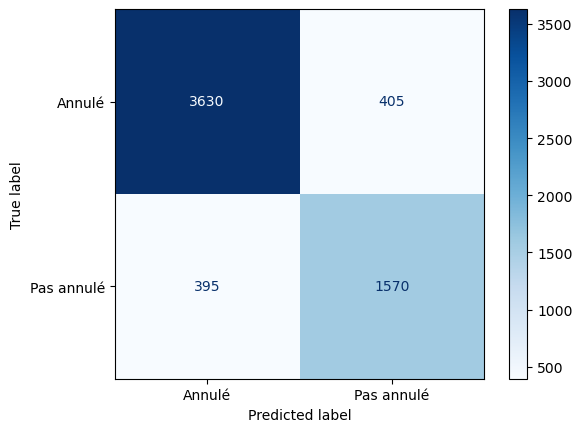

In [261]:
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, cmap=mlp.cm.Blues, display_labels=['Annulé', 'Pas annulé'])

Profondeur = 1 , score= 0.7618254042340389
Profondeur = 2 , score= 0.7618254042340389
Profondeur = 3 , score= 0.7876591820859031
Profondeur = 4 , score= 0.8179269489359339
Profondeur = 5 , score= 0.8307942879368785
Profondeur = 6 , score= 0.8380611046285491
Profondeur = 7 , score= 0.8469281102405957
Profondeur = 8 , score= 0.856861793632272
Profondeur = 9 , score= 0.8644619492137577
Profondeur = 10 , score= 0.8665619992220925
Profondeur = 11 , score= 0.8709622714896927
Profondeur = 12 , score= 0.8721956048230262
Profondeur = 13 , score= 0.8722289937211757
Profondeur = 14 , score= 0.8715289714952492
Profondeur = 15 , score= 0.8709623159415457
Profondeur = 16 , score= 0.870595665944324
Profondeur = 17 , score= 0.8688624492971051
Profondeur = 18 , score= 0.8675956715008055
Profondeur = 19 , score= 0.8654289381563594
Profondeur = 20 , score= 0.8654289048174697
Profondeur = 21 , score= 0.8635955159193198
Profondeur = 22 , score= 0.8621955548146915
Profondeur = 23 , score= 0.8613287492359838

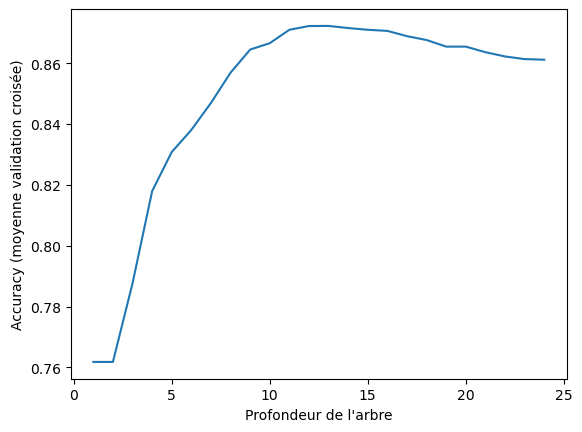

In [263]:
scores = []

for profondeur in range(1, 25):
    model = DecisionTreeClassifier(max_depth=profondeur)
    score_arbre = np.mean(cross_val_score(model, X, y, cv=5))
    print("Profondeur =", profondeur, ", score=", score_arbre)
    scores.append(score_arbre)

mlp.plot(range(1,25), scores)
mlp.xlabel('Profondeur de l\'arbre')
mlp.ylabel('Accuracy (moyenne validation croisée)')

print("Score max pour une profondeur de", np.argmax(scores)+1)

Accuracy moyenne Gini : 0.8725956659443239
Accuracy moyenne Entropy : 0.8725957826304385


<BarContainer object of 2 artists>

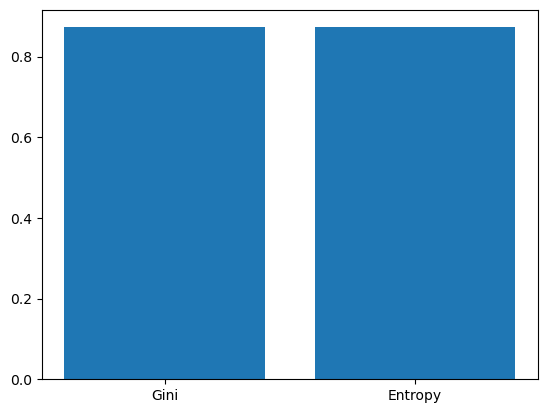

In [265]:
tree_entropy = DecisionTreeClassifier(max_depth=13, criterion='entropy')
tree_gini = DecisionTreeClassifier(max_depth=13, criterion='gini')

score_gini = np.mean(cross_val_score(tree_gini, X, y, cv=5))
score_entropy = np.mean(cross_val_score(tree_entropy, X, y, cv=5))

print('Accuracy moyenne Gini :', score_gini)
print('Accuracy moyenne Entropy :', score_entropy)

mlp.bar(['Gini', 'Entropy'], [score_gini, score_entropy])

best_accuracies.append(max(score_gini, score_entropy))

### Naive Bayes ###

In [268]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print('Accuracy =', accuracy_score(y_test, y_pred))
print('Precision =', precision_score(y_test, y_pred))
print('Rappel =', recall_score(y_test, y_pred))

best_accuracies.append(accuracy_score(y_test, y_pred))

Accuracy = 0.4196666666666667
Precision = 0.35809167446211415
Rappel = 0.9740458015267176


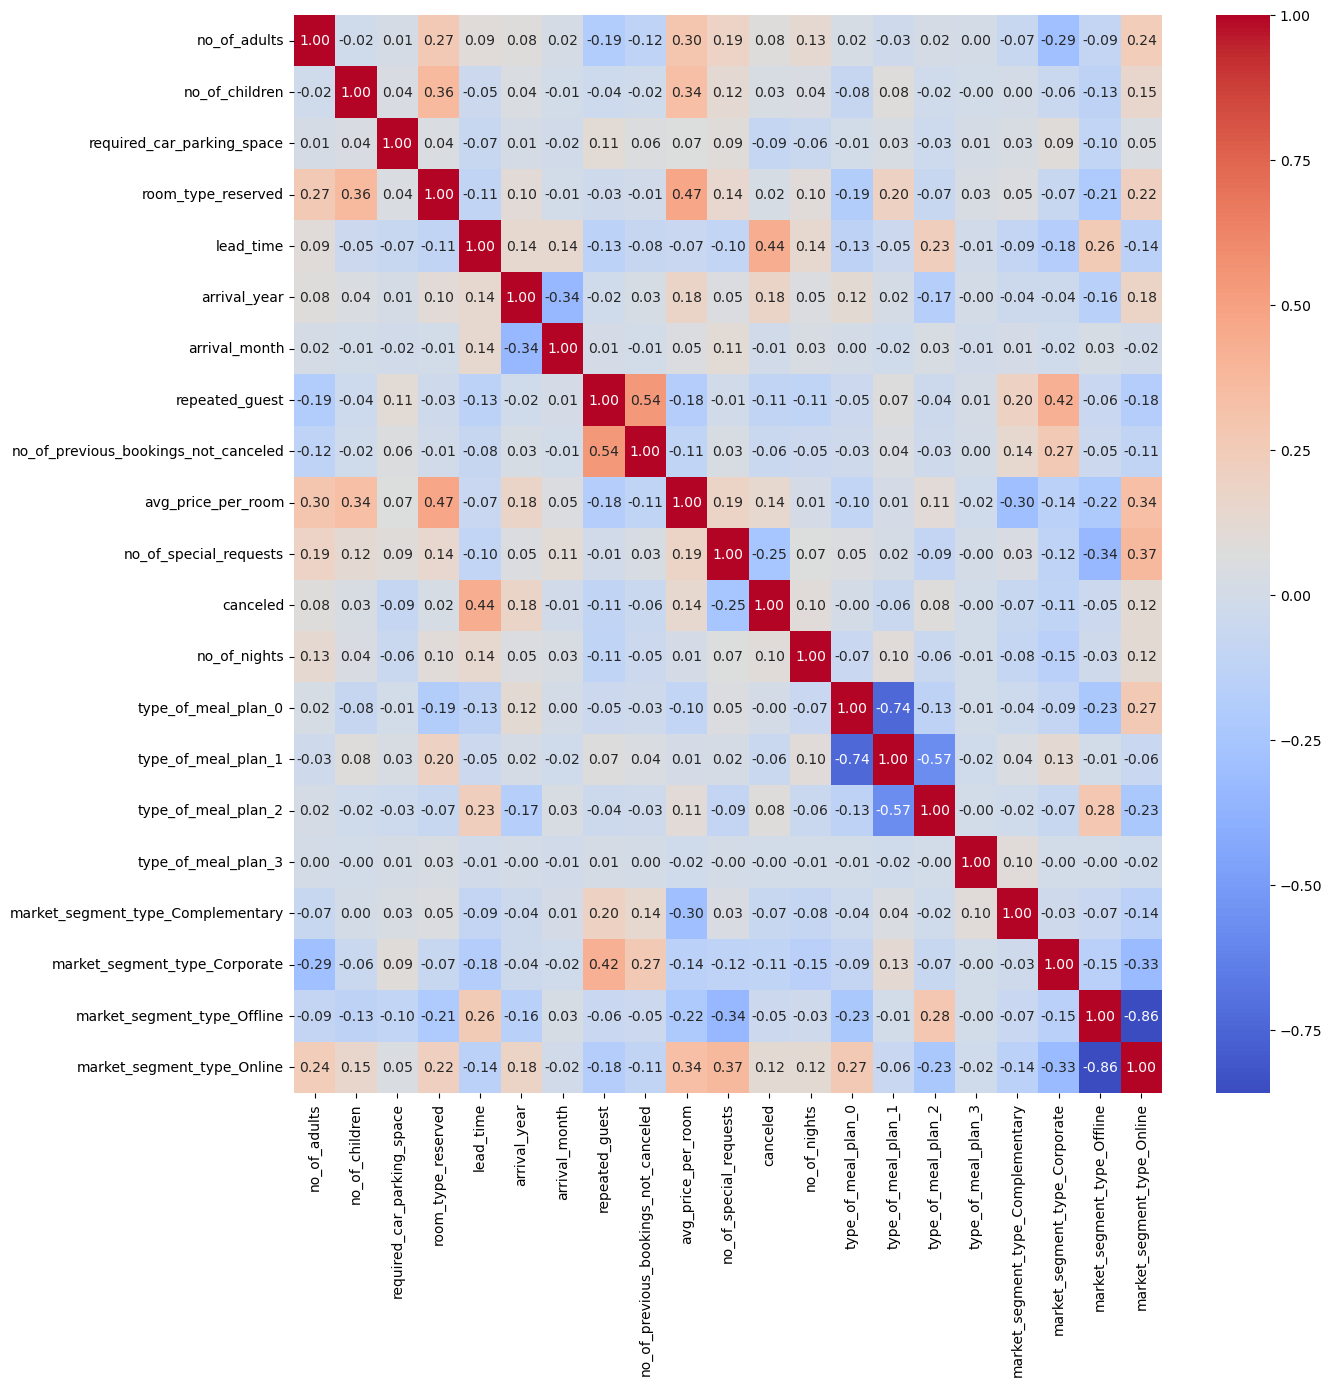

In [270]:
fig = mlp.gcf()
sns.heatmap(hd.corr(), annot=True,  cmap='coolwarm', fmt=".2f")
fig.set_size_inches(14,14)

### KNN ###

In [273]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy =', accuracy_score(y_test, y_pred))
print('Precision =', precision_score(y_test, y_pred))
print('Rappel =', recall_score(y_test, y_pred))

Accuracy = 0.8155
Precision = 0.7553571428571428
Rappel = 0.6458015267175573


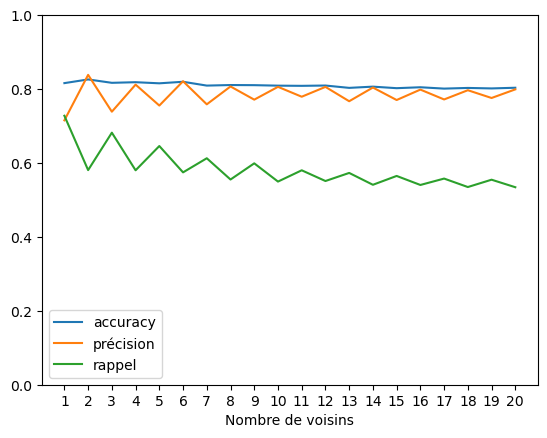

In [275]:
accuracies = []
precisions = []
recalls = []

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

mlp.plot(range(1,21), accuracies, label='accuracy')
mlp.plot(range(1,21), precisions, label='précision')
mlp.plot(range(1,21), recalls, label='rappel')
mlp.legend()
mlp.xlabel('Nombre de voisins')
mlp.xticks(range(1,21))
mlp.ylim(0,1)
mlp.show()

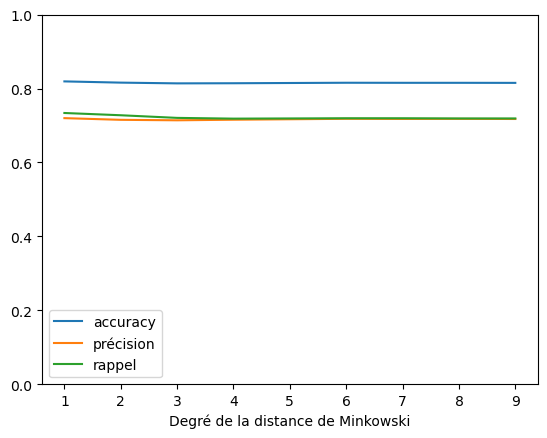

In [277]:
k = 1

accuracies = []
precisions = []
recalls = []

for p in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k, p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

mlp.plot(range(1,10), accuracies, label='accuracy')
mlp.plot(range(1,10), precisions, label='précision')
mlp.plot(range(1,10), recalls, label='rappel')
mlp.legend()
mlp.xlabel('Degré de la distance de Minkowski')
mlp.xticks(range(1,10))
mlp.ylim(0,1)
mlp.show()

best_accuracies.append(np.max(accuracies))

### SVC ###

In [280]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Accuracy =', accuracy_score(y_test, y_pred))
print('Precision =', precision_score(y_test, y_pred))
print('Rappel =', recall_score(y_test, y_pred))

Accuracy = 0.7675
Precision = 0.7614678899082569
Rappel = 0.4223918575063613


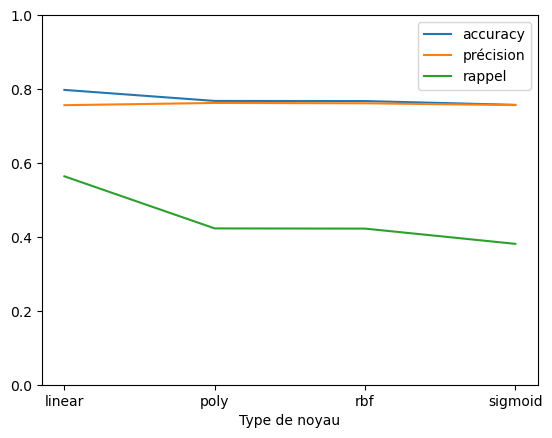

In [281]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

accuracies = []
precisions = []
recalls = []

for noyau in kernels:
    svc = SVC(kernel=noyau)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

mlp.plot(kernels, accuracies, label='accuracy')
mlp.plot(kernels, precisions, label='précision')
mlp.plot(kernels, recalls, label='rappel')
mlp.legend()
mlp.xlabel('Type de noyau')
mlp.xticks(kernels)
mlp.ylim(0,1)
mlp.show()


Meilleur noyau :  linear


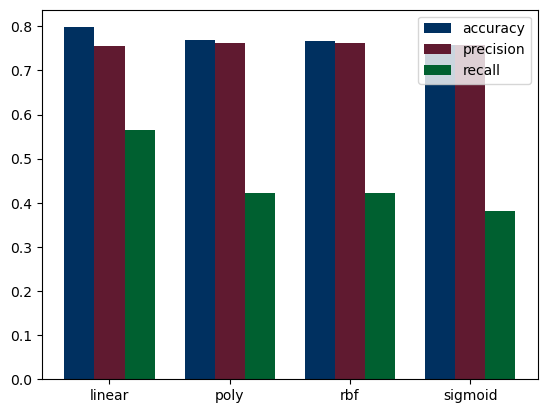

In [284]:
pos= np.arange(len(kernels))
width= 0.25

 
mlp.bar(pos - width, accuracies, color='#003060', width=width)
mlp.bar(pos, precisions, color='#601A30', width=width,)
mlp.bar(pos+width, recalls, color='#006030', width=width)
 
mlp.xticks(pos, kernels)
mlp.legend(['accuracy','precision','recall'])
 
print('Meilleur noyau : ', kernels[np.argmax(accuracies)])
best_accuracies.append(np.max(accuracies))

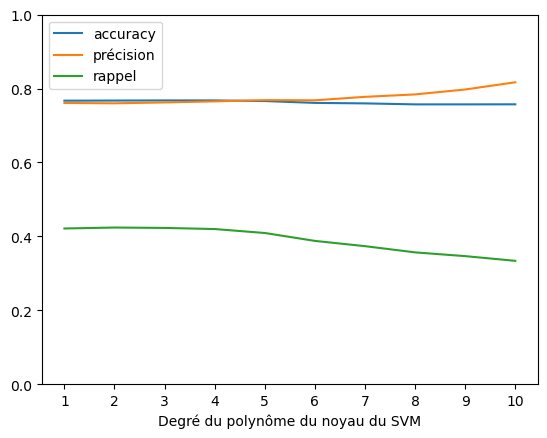

In [286]:
accuracies = []
precisions = []
recalls = []

for d in range(1,11):
    svc = SVC(kernel='poly', degree=d)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

mlp.plot(range(1,11), accuracies, label='accuracy')
mlp.plot(range(1,11), precisions, label='précision')
mlp.plot(range(1,11), recalls, label='rappel')
mlp.legend()
mlp.xlabel('Degré du polynôme du noyau du SVM')
mlp.xticks(range(1,11))
mlp.ylim(0,1)
mlp.show()

### Réseau de neurones ###

In [288]:
reseau = MLPClassifier(max_iter=300)
reseau.fit(X_train, y_train)
y_pred = reseau.predict(X_test)

print('Accuracy =', accuracy_score(y_test, y_pred))
print('Precision =', precision_score(y_test, y_pred))
print('Rappel =', recall_score(y_test, y_pred))

Accuracy = 0.8101666666666667
Precision = 0.8241758241758241
Rappel = 0.5343511450381679


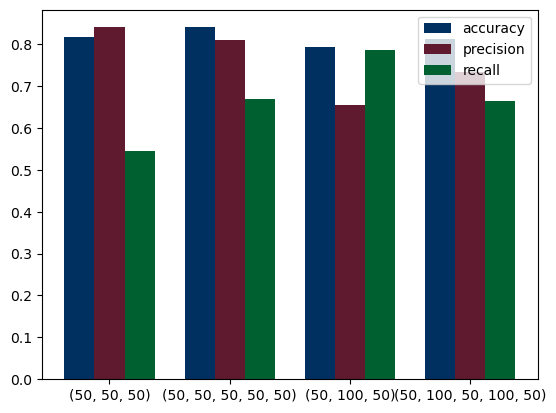

In [290]:
architectures = [(50,50,50), (50,50,50,50,50), (50,100,50), (50,100,50,100,50)]
accuracies = []
precisions = []
recalls = []

for archi in architectures:
    reseau = MLPClassifier(max_iter=300, hidden_layer_sizes=archi)
    reseau.fit(X_train, y_train)
    y_pred = reseau.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

pos= np.arange(len(architectures))
width= 0.25

 
mlp.bar(pos - width, accuracies, color='#003060', width=width)
mlp.bar(pos, precisions, color='#601A30', width=width,)
mlp.bar(pos+width, recalls, color='#006030', width=width)
 
mlp.xticks(pos, [str(archi) for archi in architectures])
mlp.legend(['accuracy','precision','recall'])

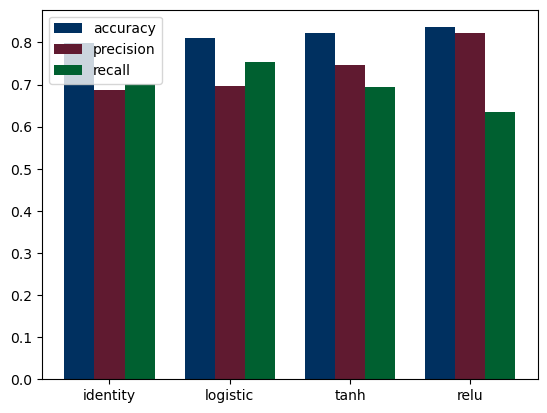

In [293]:
activations = ['identity', 'logistic', 'tanh', 'relu']
accuracies = []
precisions = []
recalls = []

for f in activations:
    reseau = MLPClassifier(max_iter=500, hidden_layer_sizes=(50,50,50,50,50), activation=f)
    reseau.fit(X_train, y_train)
    y_pred = reseau.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

pos= np.arange(len(architectures))
width= 0.25

 
mlp.bar(pos - width, accuracies, color='#003060', width=width)
mlp.bar(pos, precisions, color='#601A30', width=width,)
mlp.bar(pos+width, recalls, color='#006030', width=width)
 
mlp.xticks(pos, activations)
mlp.legend(['accuracy','precision','recall'])

best_accuracies.append(np.max(accuracies))

In [345]:
parameters = {
    'hidden_layer_sizes' : [(50,50,50), (50,50,50,50,50), (50,100,50,100,50)],
    'activation' :['identity', 'logistic']
}

ann = MLPClassifier(max_iter=300)

opti = GridSearchCV(ann, parameters, cv=5, scoring='accuracy')

opti.fit(X, y)

print('Meilleurs paramètres :', opti.best_params_)
print('Meilleur score :', opti.best_score_)

Meilleurs paramètres : {'activation': 'logistic', 'hidden_layer_sizes': (50, 50, 50)}
Meilleur score : 0.8103603489470468


### Comparaisons ###

[0.4196666666666667, 0.8193333333333334, 0.7976666666666666, 0.836]


([<matplotlib.axis.XTick at 0x3268ae0f0>,
 [Text(0, 0, 'Bayes'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'ANN')])

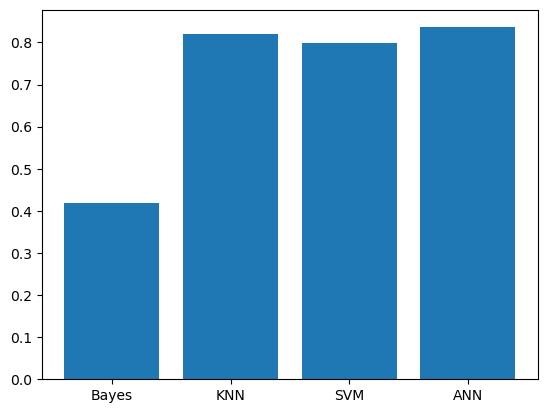

In [299]:
pos = range(len(best_accuracies))
print(best_accuracies)
mlp.bar(pos, best_accuracies)
mlp.xticks(pos, ['Arbre Décision','Bayes', 'KNN', 'SVM', 'ANN'])

### Autres modèles ###

In [681]:
accuracies_others = []
precision_others = []
recall_others = []

#### RandomForestClassifier ####


In [465]:
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [150, 200, 300, 500],
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 13, 15, 17, 20],
    'min_samples_leaf': [2, 4, 5, 6]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')

CV_rfc.fit(X_train, y_train)

print('Meilleurs paramètres :', CV_rfc.best_params_)
print('Meilleur score :', CV_rfc.best_score_)

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Meilleurs paramètres : {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Meilleur score : 0.8891202420643189


In [ ]:
# 2634 secondes pour trouver (mais entrainer sur le mauvais set .................. donc à refaire :)
# 2116 la deuxième fois 

In [683]:
rfcOpti = RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=20, n_estimators=500)

rfcOpti.fit(X_train, y_train)
y_pred = rfcOpti.predict(X_test)
print('Accuracy =', np.round(accuracy_score(y_test, y_pred)*100, 2), "%")
print('Précision =', np.round(precision_score(y_test, y_pred)*100, 2), "%")
print('Rappel =', np.round(recall_score(y_test, y_pred)*100, 2), "%")

accuracies_others.append(accuracy_score(y_test, y_pred))
precision_others.append(precision_score(y_test, y_pred))
recall_others.append(recall_score(y_test, y_pred))

Accuracy = 89.6 %
Précision = 88.38 %
Rappel = 78.58 %


##### Anciens tests #####

In [343]:
n_estimators = [100, 150, 200, 300, 500]
depths = [3, 5, 7, 10, 13, 15, 17, 20, 22, 25, 30]

def evaluate_estimators(n_estimators, depth):
    scores = []
    for n_estim in n_estimators:
        rfcBis = RandomForestClassifier(n_estimators=n_estim, max_depth=depth)
        rfcBis.fit(X, y)
        y_pred = rfcBis.predict(X_test)
        acc_score = np.round(accuracy_score(y_test, y_pred)*100, 2)
        prec_score = np.round(precision_score(y_test, y_pred)*100, 2)
        rec_score = np.round(recall_score(y_test, y_pred)*100, 2)
        scores.append(acc_score)
    print('Pour profondeur de',depth,':  A=',acc_score,'P=',prec_score,'R=',rec_score)
    #return max(scores)

for depth in depths:
    evaluate_estimators(n_estimators, depth)

Pour profondeur de 3 :  A= 78.42 P= 92.62 R= 37.05
Pour profondeur de 5 :  A= 82.88 P= 90.22 R= 53.54
Pour profondeur de 7 :  A= 84.97 P= 86.83 R= 63.77
Pour profondeur de 10 :  A= 87.83 P= 86.95 R= 73.94
Pour profondeur de 13 :  A= 90.2 P= 88.83 R= 80.15
Pour profondeur de 15 :  A= 91.27 P= 90.5 R= 81.93
Pour profondeur de 17 :  A= 92.92 P= 92.31 R= 85.5
Pour profondeur de 20 :  A= 95.05 P= 94.94 R= 89.67
Pour profondeur de 22 :  A= 96.82 P= 96.73 R= 93.44
Pour profondeur de 25 :  A= 98.15 P= 98.28 R= 96.03
Pour profondeur de 30 :  A= 99.05 P= 99.12 R= 97.96


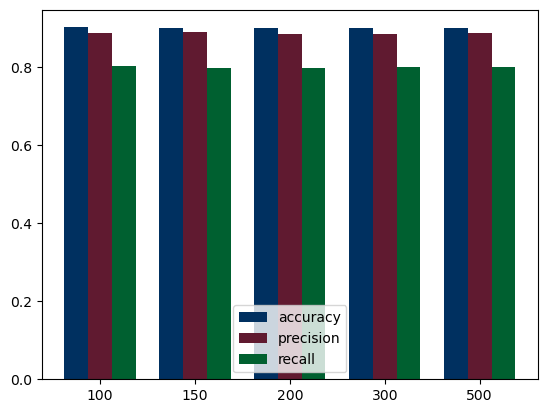

In [331]:
n_estimators = [100, 150, 200, 300, 500]
accuracies = []
precisions = []
recalls = []

for n_estim in n_estimators:
    rfcBis = RandomForestClassifier(n_estimators=n_estim, max_depth=13)
    rfcBis.fit(X, y)
    y_pred = rfcBis.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

pos= np.arange(len(n_estimators))
width= 0.25

 
mlp.bar(pos - width, accuracies, color='#003060', width=width)
mlp.bar(pos, precisions, color='#601A30', width=width,)
mlp.bar(pos+width, recalls, color='#006030', width=width)
 
mlp.xticks(pos, [str(estim) for estim in n_estimators])
mlp.legend(['accuracy','precision','recall'])

#### HGBCClassifier ####

In [475]:
HGBC = HistGradientBoostingClassifier()

param_grid = {
              'max_iter' : [200, 300, 400, 500],
              'learning_rate': [ 0.1, 0.3, 0.6, 1.0],
              'max_depth': [8, 10, 12],
              'min_samples_leaf': [50, 100, 120, 150],
              'max_features': [0.1, 0.3, 0.5] 
              }
CV_hgbc = GridSearchCV(estimator=HGBC, param_grid=param_grid, cv=5, scoring='accuracy')
CV_hgbc.fit(X_train, y_train)
print('Meilleurs paramètres :', CV_hgbc.best_params_)
print('Meilleur score :', CV_hgbc.best_score_)

Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 12, 'max_features': 0.3, 'max_iter': 400, 'min_samples_leaf': 50}
Meilleur score : 0.8857452073348615


In [ ]:
# 1930 secondes d'entrainement

In [685]:
hgbcOpti = HistGradientBoostingClassifier(learning_rate=0.1, max_depth=12, max_features=0.3, max_iter=400, min_samples_leaf=50)

hgbcOpti.fit(X_train, y_train)
y_pred = hgbcOpti.predict(X_test)
print('Accuracy =', np.round(accuracy_score(y_test, y_pred)*100, 2), "%")
print('Précision =', np.round(precision_score(y_test, y_pred)*100, 2), "%")
print('Rappel =', np.round(recall_score(y_test, y_pred)*100, 2), "%")

accuracies_others.append(accuracy_score(y_test, y_pred))
precision_others.append(precision_score(y_test, y_pred))
recall_others.append(recall_score(y_test, y_pred))

Accuracy = 88.62 %
Précision = 85.22 %
Rappel = 78.93 %


#### ExtraTreeClassifier ####

In [479]:
etc = ExtraTreesClassifier()
param_grid = {
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "n_estimators" :[100,300],
}

CV_etc = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5, scoring='accuracy')

CV_etc.fit(X_train, y_train)
print('Meilleurs paramètres :', CV_etc.best_params_)
print('Meilleur score :', CV_etc.best_score_)

Meilleurs paramètres : {'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Meilleur score : 0.8898703028408697


In [687]:
etcOpti = ExtraTreesClassifier(min_samples_split=10, max_features=10, n_estimators=300, min_samples_leaf=1)

etcOpti.fit(X_train, y_train)
y_pred = etcOpti.predict(X_test)
print('Accuracy =', np.round(accuracy_score(y_test, y_pred)*100, 2), "%")
print('Précision =', np.round(precision_score(y_test, y_pred)*100, 2), "%")
print('Rappel =', np.round(recall_score(y_test, y_pred)*100, 2), "%")

accuracies_others.append(accuracy_score(y_test, y_pred))
precision_others.append(precision_score(y_test, y_pred))
recall_others.append(recall_score(y_test, y_pred))

Accuracy = 89.92 %
Précision = 87.95 %
Rappel = 80.2 %


#### Voting Classifier ####

In [713]:
vc1 = VotingClassifier([('rfc', CV_rfc.best_estimator_),
                        ('hgbc', CV_hgbc.best_estimator_),
                          ('etc', CV_etc.best_estimator_)
                         ], voting='hard', weights=[2,3,7] )

vc1.fit(X_train, y_train)
y_pred = vc1.predict(X_test)
print('Accuracy =', np.round(accuracy_score(y_test, y_pred)*100, 2), "%")
print('Précision =', np.round(precision_score(y_test, y_pred)*100, 2), "%")
print('Rappel =', np.round(recall_score(y_test, y_pred)*100, 2), "%")

accuracies_others.append(accuracy_score(y_test, y_pred))
precision_others.append(precision_score(y_test, y_pred))
recall_others.append(recall_score(y_test, y_pred))

Accuracy = 89.82 %
Précision = 87.65 %
Rappel = 80.2 %


##### Tests #####

In [711]:
best_acc = 0
result = (1,1,1)
for i in range(1,5):
    print('--',i,'--')
    for j in range(1,5):
        for k in range(1,8):
            voting_classifier = VotingClassifier([('rfc', CV_rfc.best_estimator_),
                        ('hgbc', CV_hgbc.best_estimator_),
                          ('etc', CV_etc.best_estimator_)
                         ], voting='hard', weights=[i,j,k] )
            voting_classifier.fit(X_train, y_train)
            y_pred = voting_classifier.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
        
            if accuracy > best_acc:
                best_acc = accuracy
                result = (i,j,k)
        print("Meilleure accuracy pour l'instant :", np.round((best_acc)*100, 2),'%. Avec pour paramètres :',result)
    

-- 1 --
Meilleure accuracy pour l'instant : 89.97 %. Avec pour paramètres : (1, 1, 7)
Meilleure accuracy pour l'instant : 89.97 %. Avec pour paramètres : (1, 1, 7)
Meilleure accuracy pour l'instant : 89.97 %. Avec pour paramètres : (1, 1, 7)
Meilleure accuracy pour l'instant : 89.98 %. Avec pour paramètres : (1, 4, 6)
-- 2 --
Meilleure accuracy pour l'instant : 89.98 %. Avec pour paramètres : (1, 4, 6)
Meilleure accuracy pour l'instant : 89.98 %. Avec pour paramètres : (1, 4, 6)
Meilleure accuracy pour l'instant : 90.08 %. Avec pour paramètres : (2, 3, 7)
Meilleure accuracy pour l'instant : 90.08 %. Avec pour paramètres : (2, 3, 7)
-- 3 --
Meilleure accuracy pour l'instant : 90.08 %. Avec pour paramètres : (2, 3, 7)
Meilleure accuracy pour l'instant : 90.08 %. Avec pour paramètres : (2, 3, 7)
Meilleure accuracy pour l'instant : 90.08 %. Avec pour paramètres : (2, 3, 7)
Meilleure accuracy pour l'instant : 90.08 %. Avec pour paramètres : (2, 3, 7)
-- 4 --
Meilleure accuracy pour l'instan

#### Comparaisons ####

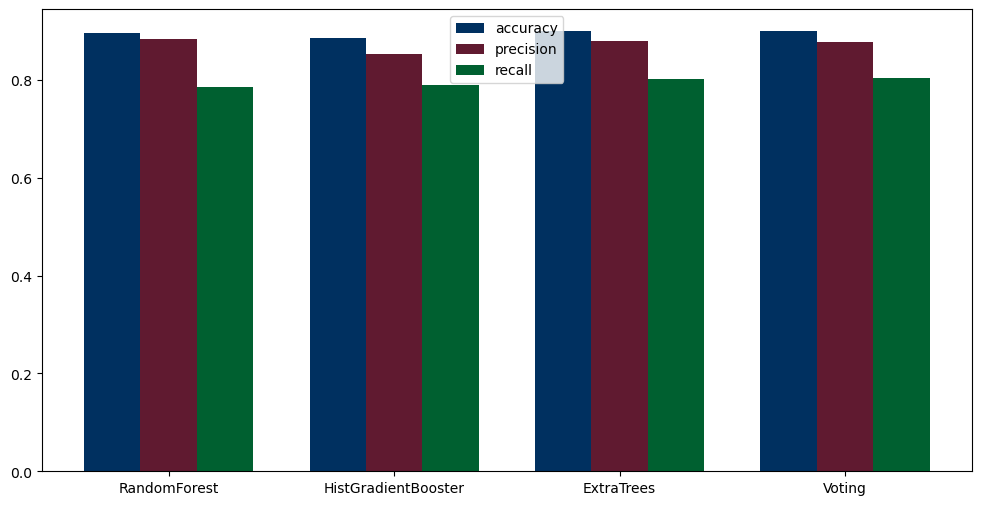

In [691]:
models = ['RandomForest', 'HistGradientBooster', 'ExtraTrees', 'Voting']
pos= np.arange(len(models))
width= 0.25

fig = mlp.gcf()

for model in models:
    mlp.bar(pos - width, accuracies_others, color='#003060', width=width)
    mlp.bar(pos, precision_others, color='#601A30', width=width,)
    mlp.bar(pos+width, recall_others, color='#006030', width=width)
 
mlp.xticks(pos, models)
mlp.legend(['accuracy','precision','recall'])

fig.set_size_inches(12,6)

## Normalisées ##

In [ ]:
# Import
from sklearn.preprocessing import normalize

#### Naive Bayes ####

In [514]:
# Normalisation
gnb = GaussianNB()
gnb.fit(X_norm_train, y_norm_train)
y_pred = gnb.predict(X_norm_test)

print('Accuracy =', accuracy_score(y_norm_test, y_pred))
print('Precision =', precision_score(y_norm_test, y_pred))
print('Rappel =', recall_score(y_norm_test, y_pred))

best_accuracies.append(accuracy_score(y_norm_test, y_pred))

ValueError: Unknown label type: (array([0.        , 0.00048377, 0.00048381, ..., 0.00049552, 0.00049556,
       0.00049561]),)

# Prédictions #

In [693]:
def map_canceled(dataframe):
    return dataframe[0].map({0: 'Not_Canceled', 1: 'Canceled'})

In [717]:
#Fonction utilitaire pour prédire sur le jeu de test avec un algo, mapper, et exporter en CSV avec le bon nom

def predire_to_CSV(algo, name):
    algoPred = algo.predict(hdTest)
    algo_df = pd.DataFrame(algoPred)
    algo_df[0] = map_canceled(algo_df)

    algo_df.to_csv(name+'.csv', index=False)

In [719]:
hdTest = pd.read_csv('hotel_data_clean_test.csv')
hdTest

no_of_adults  no_of_children  required_car_parking_space  \
0                1               0                           0   
1                2               0                           0   
2                1               0                           0   
3                2               0                           0   
4                2               0                           0   
...            ...             ...                         ...   
6271             3               0                           0   
6272             2               0                           0   
6273             2               0                           0   
6274             2               0                           0   
6275             2               0                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0                      1          7          2017             10   
1                      1        102          2017             10   
2                      1         96          2018             11   
3                      1        118          2018              4   
4                      1         25          2018              1   
...                  ...        ...           ...            ...   
6271                   4         85          2018              8   
6272                   1        228          2018             10   
6273                   1        148          2018              7   
6274                   1         63          2018              4   
6275                   1        207          2018             12   

      repeated_guest  no_of_previous_bookings_not_canceled  \
0                  0                                     0   
1                  0                                     0   
2                  0                                     0   
3                  0                                     0   
4                  0                                     0   
...              ...                                   ...   
6271               0                                     0   
6272               0                                     0   
6273               0                                     0   
6274               0                                     0   
6275               0                                     0   

      avg_price_per_room  no_of_special_requests  no_of_nights  \
0                 126.00                       1             3   
1                 101.50                       0             2   
2                  79.00                       1             5   
3                  97.75                       1             5   
4                  40.67                       0             3   
...                  ...                     ...           ...   
6271              167.80                       1             8   
6272               90.95                       2             4   
6273               98.39                       2             8   
6274               94.50                       0             3   
6275              161.67                       0             3   

      type_of_meal_plan_0  type_of_meal_plan_1  type_of_meal_plan_2  \
0                     0.0                  1.0                  0.0   
1                     0.0                  0.0                  1.0   
2                     0.0                  1.0                  0.0   
3                     0.0                  1.0                  0.0   
4                     0.0                  1.0                  0.0   
...                   ...                  ...                  ...   
6271                  0.0                  1.0                  0.0   
6272                  0.0                  1.0                  0.0   
6273                  0.0                  1.0                  0.0   
6274                  1.0                  0.0                  0.0   
6275                  0.0                  1.0                  0.0   

     

In [721]:
#Arbre de décision classique
predire_to_CSV(tree, 'ivan-tree')

In [723]:
#RandomForest
predire_to_CSV(rfcOpti, 'ivan-rfc')

In [724]:
#RandomForest
predire_to_CSV(hgbcOpti, 'ivan-hgbc')

In [725]:
#RandomForest
predire_to_CSV(etcOpti, 'ivan-etc')

In [729]:
#RandomForest
predire_to_CSV(vc1, 'ivan-voting')